In [ ]:
from model import Model
from attacks import *
from matplotlib import pyplot as plt
from scipy.spatial.distance import euclidean
import torch
import matplotlib.pyplot as plt
from torchvision.transforms import Normalize
import numpy as np
from scipy.spatial.distance import euclidean
import heapq
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
model = Model()

In [ ]:
model.loadModel()

In [ ]:
model.loadData(bs=1)

In [ ]:
classes = model.dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
for index in range(0,7):
    latent_space = []
    print(index)
    for k,data in enumerate(model.trainset):
        img = data[0]
        label = data[1]
        pred = model.identify(img)
        #for i,r in enumerate(model.model.layers):
        latent_space.append(model.model.layers[index])
        if(k%10000==0):
            print(k)
    # print(type(latent_space))
    # n=np.array(latent_space)
    np.save('ls'+str(index)+'.npy',np.array(latent_space, dtype=object))

In [ ]:
for i,ls in enumerate(latent_space):
    l = np.array(ls)
    np.save('ls'+str(i)+'.npy',l)

In [ ]:
def nnel(img,layer_index,K,printt=0):
    pred = model.identify(img)
    r = model.model.layers
    
    ls = np.load('ls'+str(layer_index)+'.npy',allow_pickle=True)
    heap = []
    heapq.heapify(heap)
    v = r[layer_index]
    
    for i,l in enumerate(ls):
        # l= torch.from_numpy(l)
        d = euclidean(torch.flatten(l).cpu(),torch.flatten(v).cpu())
        if len(heap)==K:
            heapq.heappushpop(heap,(-d,i))
        else:
            heapq.heappush(heap,(-d,i))
    if printt==0:
        nn = [classes[model.trainset[h[1]][1]] for h in heap] #(h[1],
        print(nn)
    else:
        nn = [0 for i in range(10)]
        for h in heap:
            nn[model.trainset[h[1]][1]] += 1
        print(nn)

True Label :cat
ship


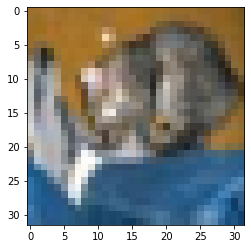

In [ ]:
import numpy as np
index = 0
img = model.testset[index][0]
img2 = img/ 2 + 0.5     # unnormalize
label = model.testset[index][1]
npimg = img2.numpy()
print('True Label :' + classes[label])
plt.imshow(np.transpose(npimg, (1, 2, 0)))
#plt.show()
pred = model.identify(img)
print(classes[pred])

In [ ]:
r = model.model.layers
len(r)

7

In [ ]:
nnel(img,0,8)

In [ ]:
nnel(img,1,8)

['frog', 'ship', 'frog', 'frog', 'cat', 'deer', 'dog', 'cat']


In [ ]:
nnel(img,2,8)

['deer', 'deer', 'deer', 'deer', 'cat', 'deer', 'frog', 'deer']


In [ ]:
nnel(img,3,8)

['cat', 'deer', 'deer', 'cat', 'deer', 'frog', 'dog', 'frog']


In [ ]:
nnel(img,4,8)

['cat', 'deer', 'deer', 'cat', 'deer', 'frog', 'dog', 'frog']


In [ ]:
nnel(img,5,8)

['cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat']


In [ ]:
nnel(img,6,8)

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat']


In [ ]:
for i in range(7):
    print('-------------layer '+str(i)+'---------------')
    nnel(img,i,8)

-------------layer 0---------------
['cat', 'ship', 'deer', 'deer', 'dog', 'cat', 'deer', 'cat']
-------------layer 1---------------
['frog', 'ship', 'frog', 'frog', 'cat', 'deer', 'dog', 'cat']
-------------layer 2---------------
['deer', 'deer', 'deer', 'deer', 'cat', 'deer', 'frog', 'deer']
-------------layer 3---------------
['cat', 'deer', 'deer', 'cat', 'deer', 'frog', 'dog', 'frog']
-------------layer 4---------------
['cat', 'deer', 'deer', 'cat', 'deer', 'frog', 'dog', 'frog']
-------------layer 5---------------
['cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat']
-------------layer 6---------------
['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat']


In [ ]:
#FGSM PARAMTERS:
fgsm_params={'eps':0.03}
fgsm = FGSM_Attack(model)
new_img= fgsm.generate_adv((img[None, ...]).to(model.device),
                                     torch.tensor([label]).to(model.device),
                                     **fgsm_params)
new_img = new_img[0]
print(classes[model.identify(new_img)])

dog


In [ ]:
for i in range(7):
    print('-------------layer '+str(i)+'---------------')
    nnel(new_img,i,8)

In [ ]:
nnel(img,4,100,printt=1)

[0, 0, 2, 30, 21, 24, 18, 3, 2, 0]


In [ ]:
nnel(new_img,4,100,printt=1)

[0, 1, 1, 27, 15, 34, 15, 6, 0, 1]


In [ ]:
nnel(img,5,100,printt=1)

[0, 0, 0, 68, 2, 30, 0, 0, 0, 0]


In [ ]:
nnel(new_img,5,100,printt=1)

[0, 0, 0, 5, 0, 95, 0, 0, 0, 0]


In [ ]:
nnel(img,6,100,printt=1)

[0, 0, 1, 66, 0, 33, 0, 0, 0, 0]


In [ ]:
nnel(new_img,6,100,printt=1)

[0, 0, 0, 2, 0, 98, 0, 0, 0, 0]


### Check the entries on which adv. and original vectors differ much

In [ ]:
#checking for more examples
eps=0
vecs=[]
adv_vecs=[]
keys=[]
ind_diff=[]
for i in range(len(model.testset)):  #

  print("___________________________")
  img = model.testset[i][0]
  pred = classes[model.identify(img)]
  
  vec= model.model.layers[4]
  vecn= [t.cpu().detach().numpy() for t in vec]
  vecs.append(vecn)
  #generate adversarial
  new_img= fgsm.generate_adv((img[None, ...]).to(model.device),
                                     torch.tensor([label]).to(model.device),
                                     **fgsm_params)
  new_img = new_img[0]
  pred_adv=classes[model.identify(new_img)]
  adv_vec= model.model.layers[4]
  
  adv_vecn= [t.cpu().detach().numpy() for t in adv_vec]
  adv_vecs.append(adv_vecn)

  #the entries on which the difference between the adv. example and the original one is above 'eps'
  if eps==0:
    print(type(torch.abs(adv_vec-vec)))
    eps= 8*torch.mean(torch.abs(adv_vec-vec))

  diff_ind= torch.where(torch.abs(adv_vec-vec)>eps)[1]
  print(diff_ind)
  eps=0  

  processed_pair=str(i)+'-'+pred+'-'+ pred_adv
  keys.append(processed_pair)
  if pred!= pred_adv:
    ind_diff.append(i)


  ##KNNs  
  # print("-------- after pool 1 --------")
  # nnel(img,0,100,printt=1)
  # nnel(new_img,0,100,printt=1)

  # print("-------- after pool 2 --------")
  # nnel(img,2,100,printt=1)
  # nnel(new_img,2,100,printt=1)
  # print("-------- after pool 3 --------")
  # nnel(img,3,100,printt=1)
  # nnel(new_img,3,100,printt=1)

  # print("-------- after fc1 + relu --------")
  # nnel(img,5,100,printt=1)
  # nnel(new_img,5,100,printt=1)

  # print("-------- after fc2 --------")
  # nnel(img,6,100,printt=1)
  # nnel(new_img,6,100,printt=1)



In [ ]:
#being it untrackable to compare on all 512 entries, reduce dimension.
pca= PCA(n_components=40)
print(len(vecs+adv_vecs))
np_vecs= np.asarray(vecs+adv_vecs, dtype=object).squeeze()
print(type(np_vecs), np_vecs.shape)
new_vecs = pca.fit_transform(np_vecs)
print(new_vecs.shape)

In [ ]:

eps=0
vecs=new_vecs[:10000,: ]
adv_vecs=new_vecs[10000:,: ]
print(vecs.shape)
print(adv_vecs.shape)
dif= np.vstack(adv_vecs[0,:]-vecs[0,:]).T
print(dif.shape)
for i in range(10000):
  if i in ind_diff:
    print("---------------------\n")
  print(keys[i])

    #the entries on which the difference between the adv. example and the original one is above 'eps'
  if eps==0:
    
    eps= 2*np.mean(np.abs(adv_vecs[i,:]-vecs[i,:]))
  diff_vec= np.vstack(adv_vecs[0,:]-vecs[0,:]).T
  diff_ind= np.where(np.abs(diff_vec)>eps)[1]
  print(diff_ind)
  eps=0  
  

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
7786-truck-truck
[ 1 29]
7787-dog-dog
[ 1  4  9 13 29 36]
7788-frog-frog
[1]
---------------------

7789-cat-horse
[ 1 29]
7790-ship-ship
[ 1  9 13 29]
7791-frog-frog
[1]
7792-automobile-automobile
[ 1 29]
7793-ship-ship
[ 1  9 13 29]
7794-frog-frog
[ 1  9 13 29]
---------------------

7795-deer-horse
[ 1 29]
7796-ship-ship
[ 1  9 13 29]
7797-frog-frog
[ 1  9 13 29]
---------------------

7798-cat-frog
[1]
7799-truck-truck
[1]
7800-airplane-airplane
[ 1  9 13 29]
7801-deer-deer
[1]
7802-bird-bird
[ 0  1  4  5  9 13 24 29 36]
7803-airplane-airplane
[ 0  1  4  5  8  9 10 13 18 24 25 29 36 37]
7804-dog-dog
[ 1 29]
7805-truck-truck
[ 1 29]
7806-truck-truck
[1]
---------------------

7807-cat-dog
[ 1  9 13 29]
7808-ship-ship
[ 1 29]
7809-deer-deer
[ 1  9 13 29]
7810-frog-frog
[1]
7811-airplane-airplane
[ 1  9 13 29 36]
7812-bird-bird
[ 1  9 13 29]
---------------------

7813-airplane-ship
[ 0  1  4  5  8  9 13 18 

### Plot outputs of last pooling layer (unflattened fully connected inputs)

___________________________________________________________________________________
---------------------------  Indentified as  cat ----------------------------
-----------------  Adversarial version identified as  dog -----------------


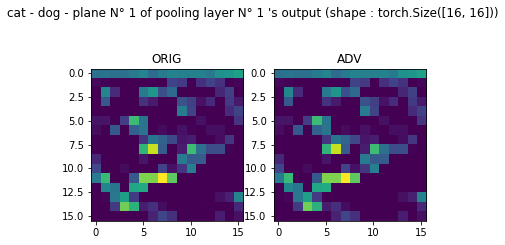

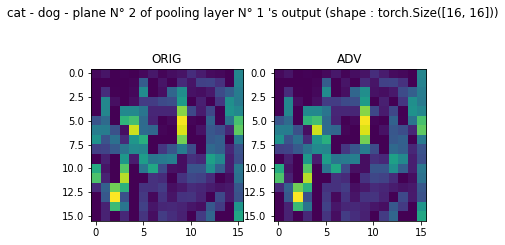

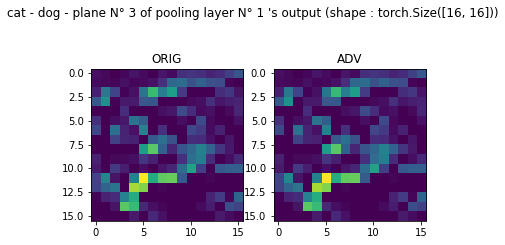

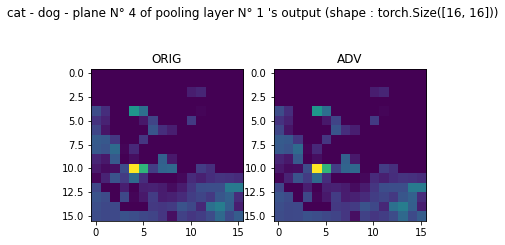

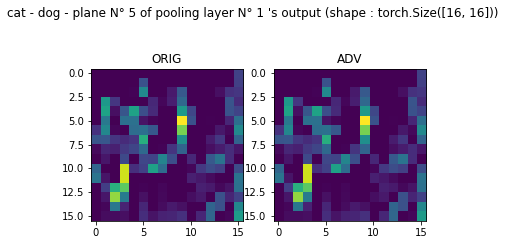

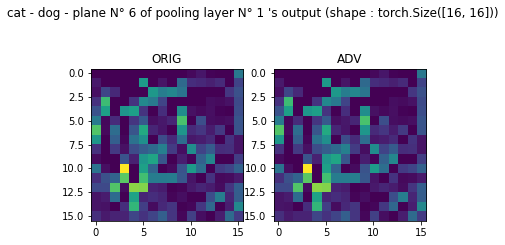

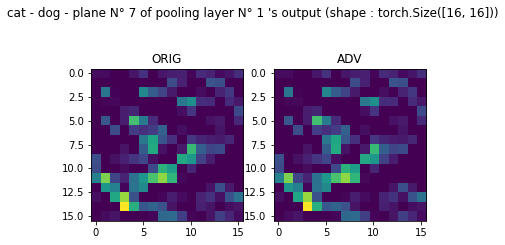

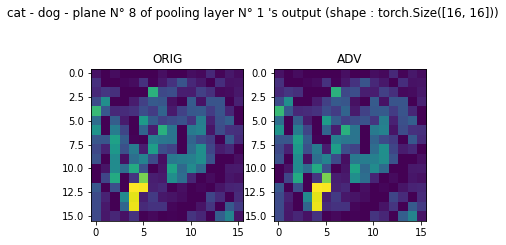

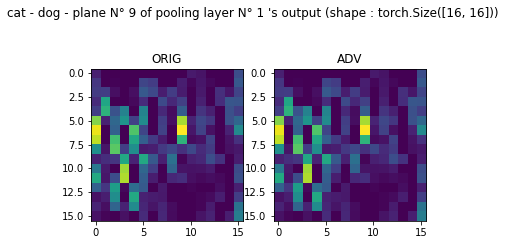

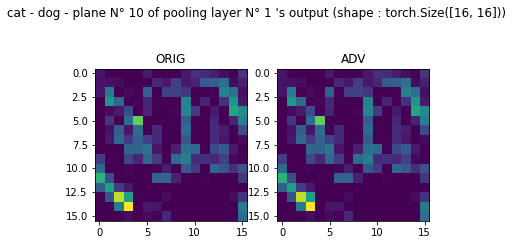

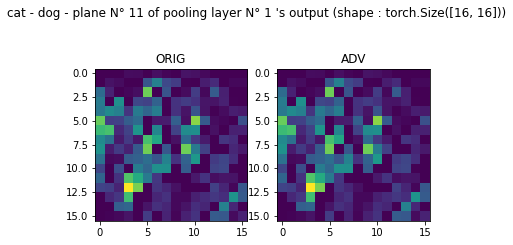

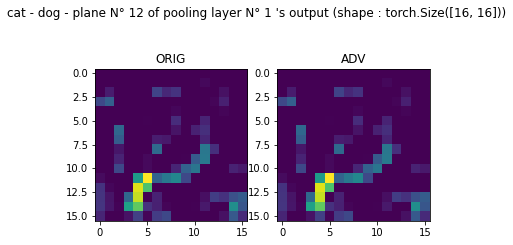

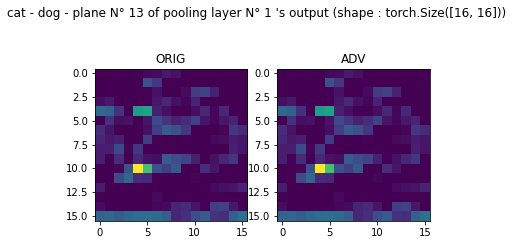

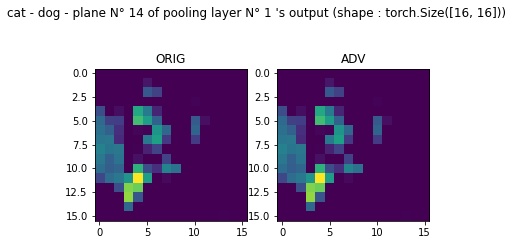

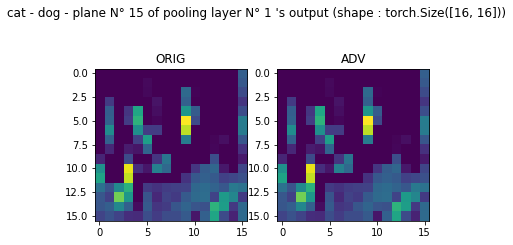

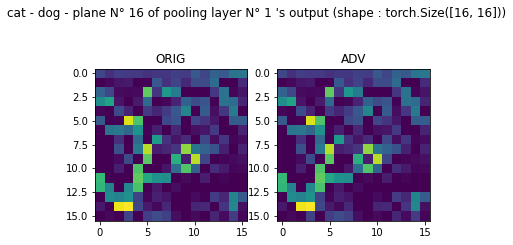

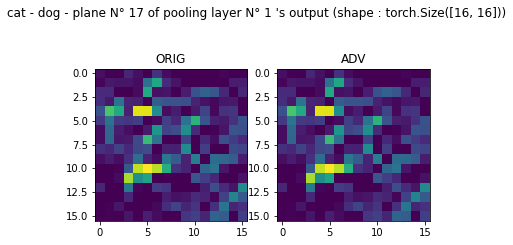

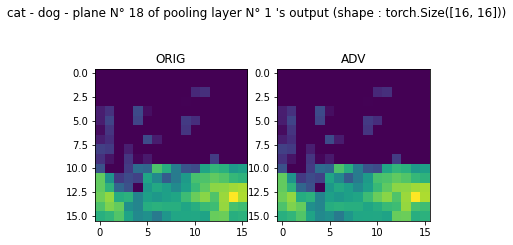

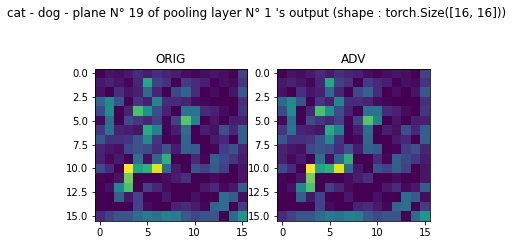

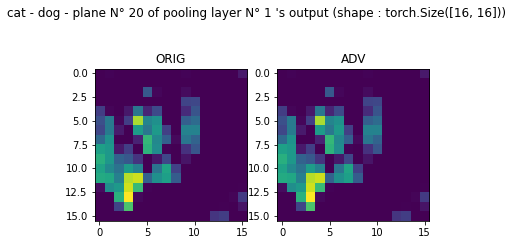

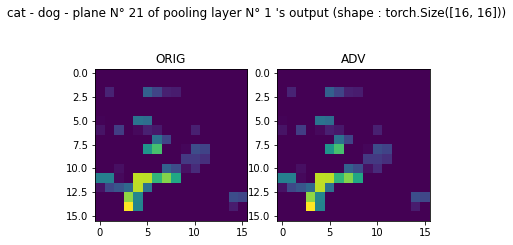

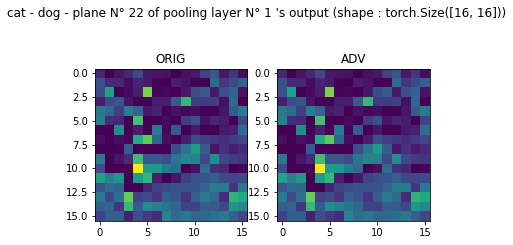

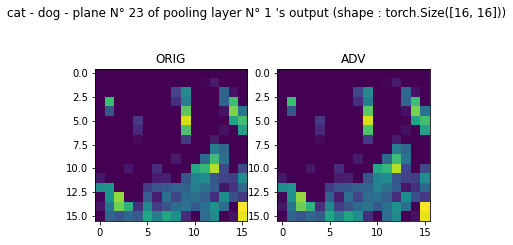

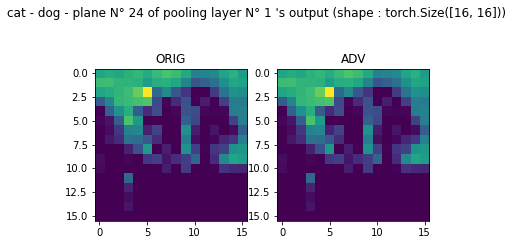

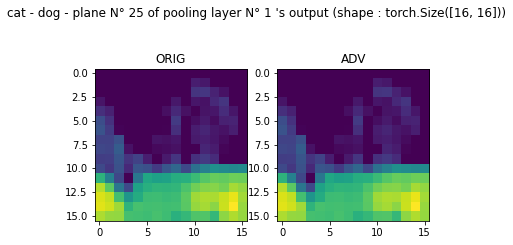

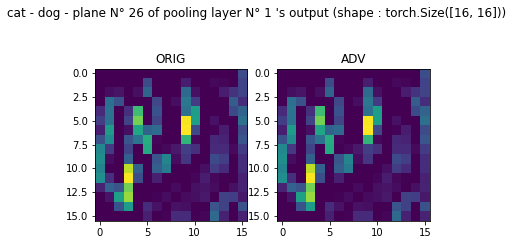

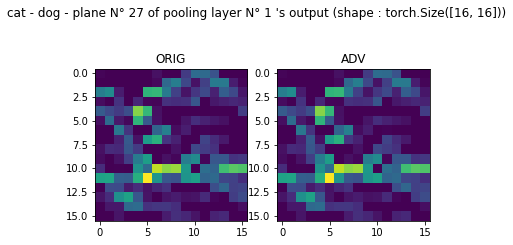

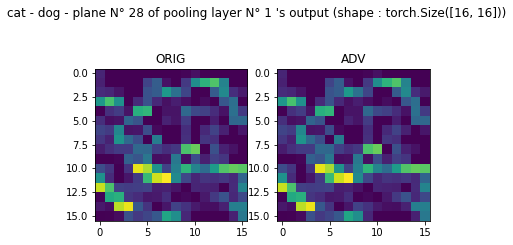

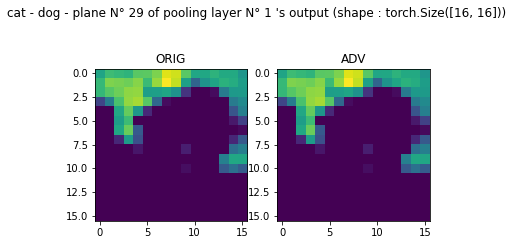

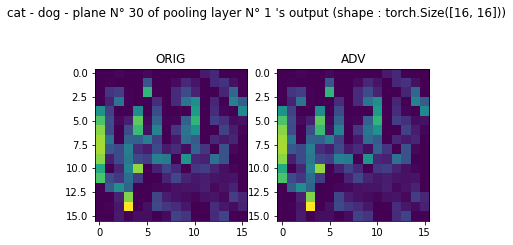

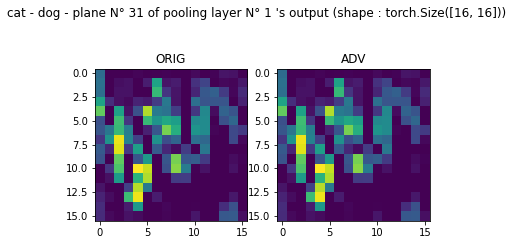

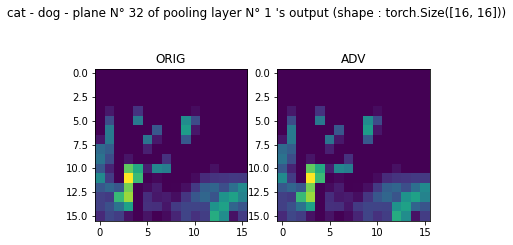

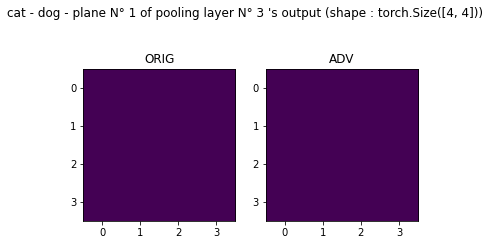

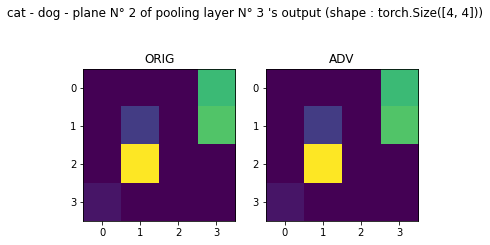

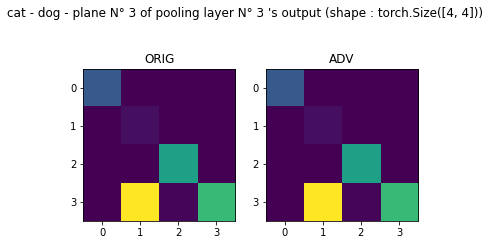

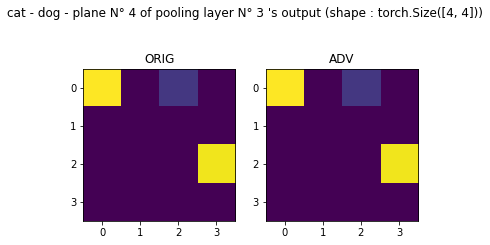

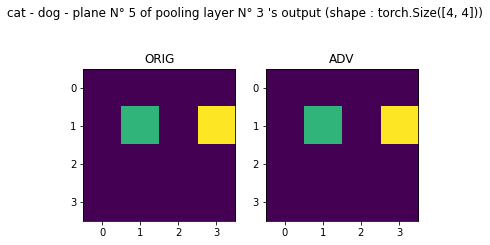

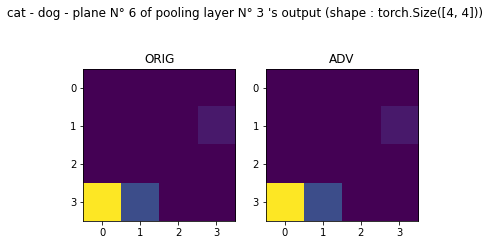

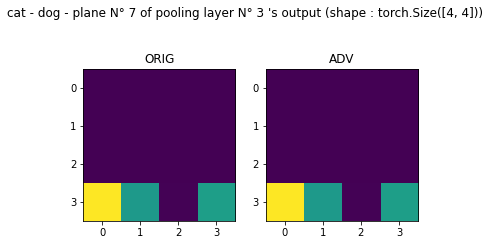

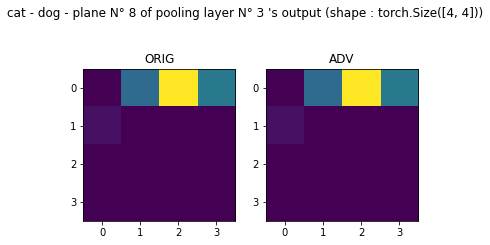

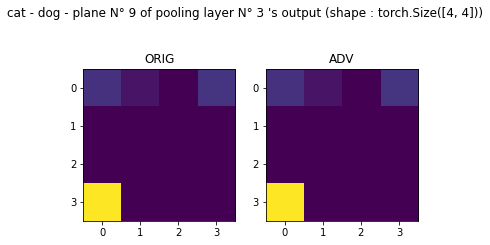

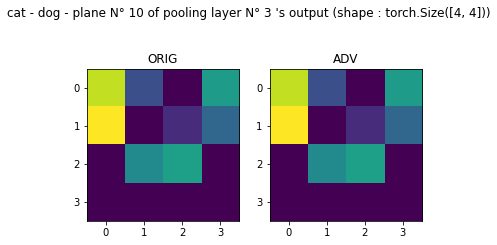

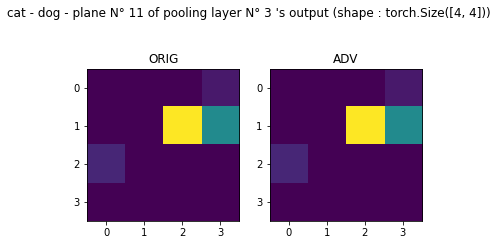

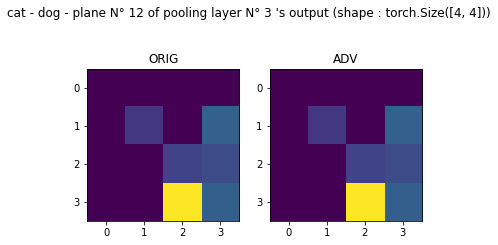

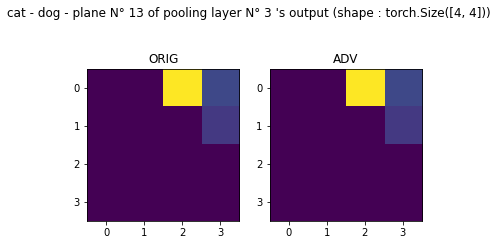

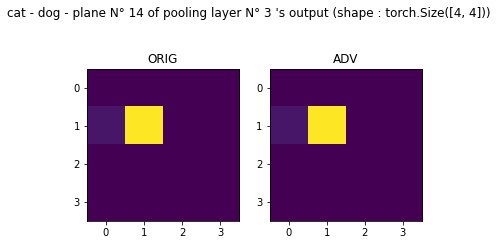

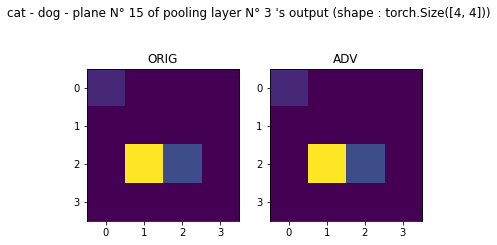

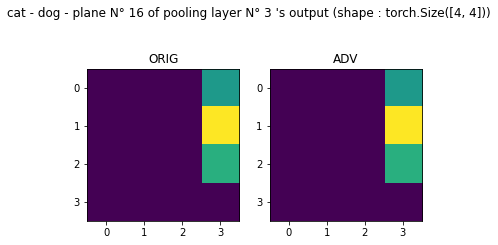

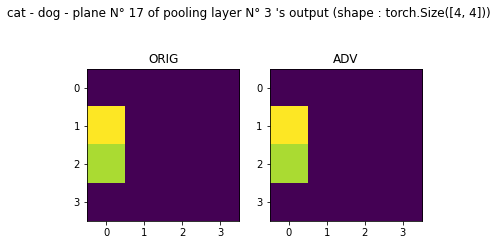

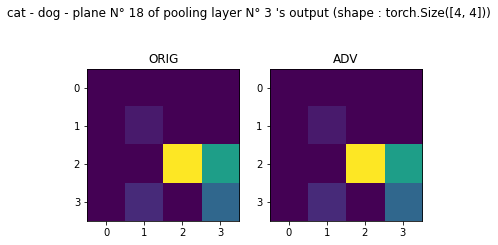

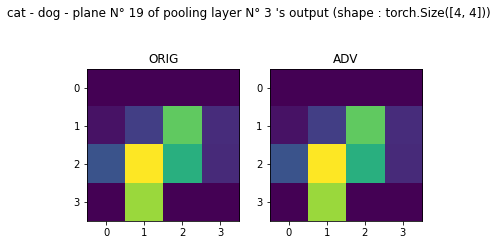

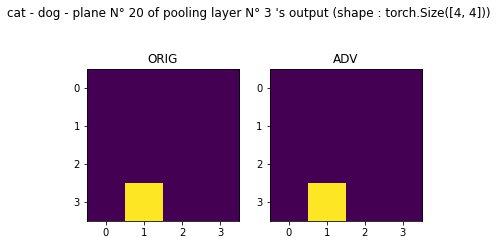

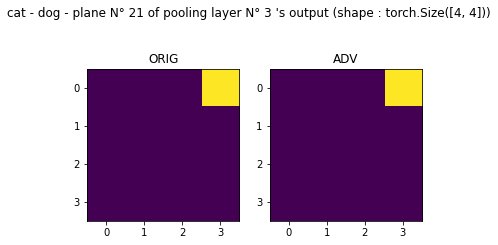

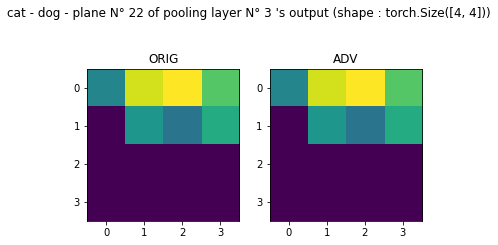

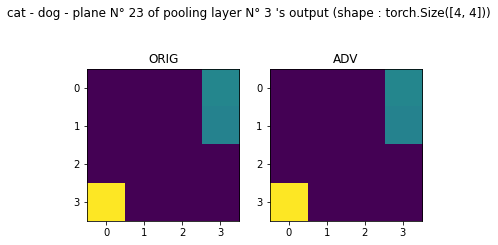

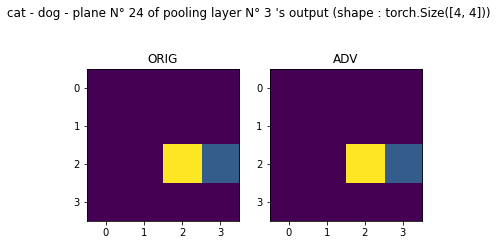

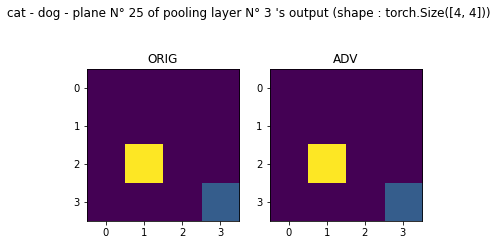

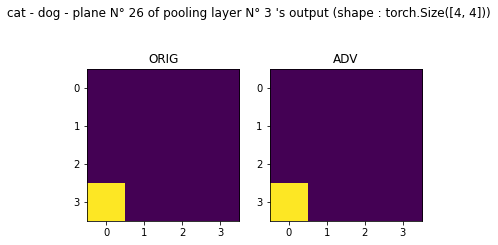

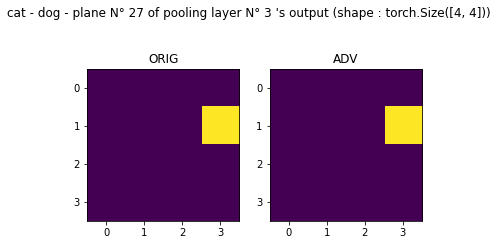

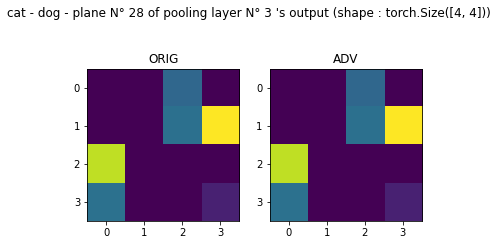

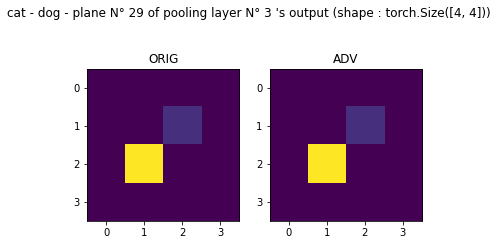

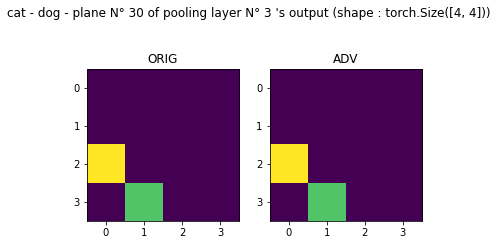

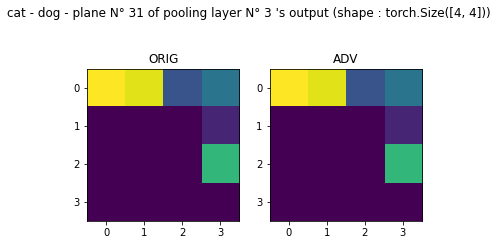

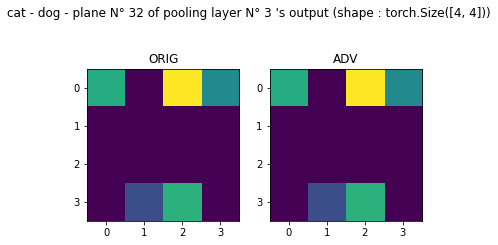

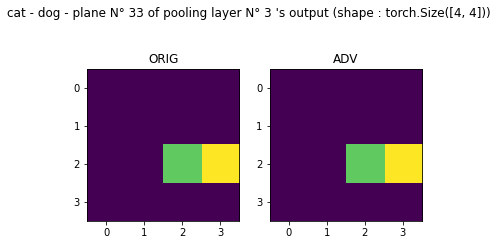

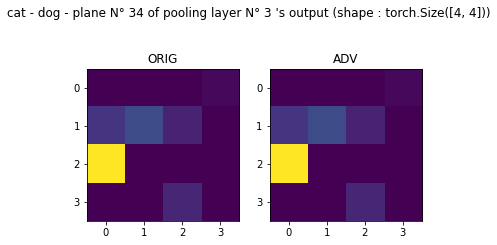

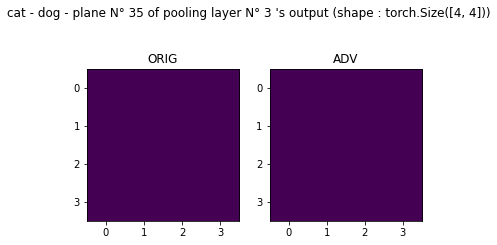

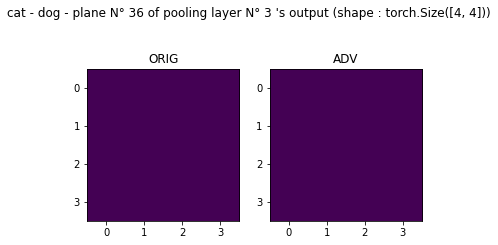

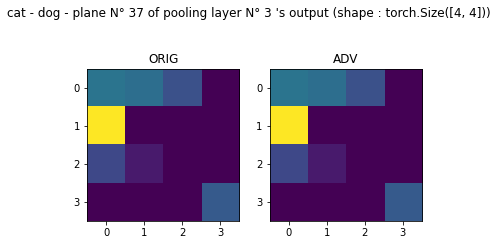

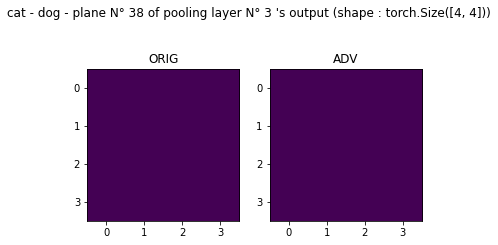

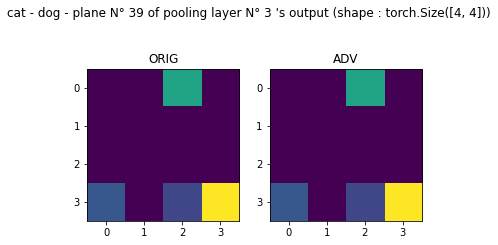

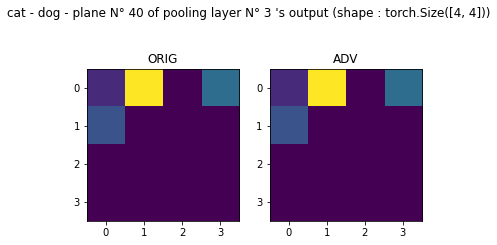

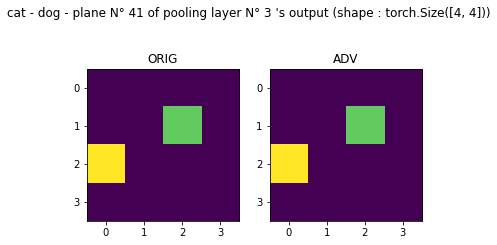

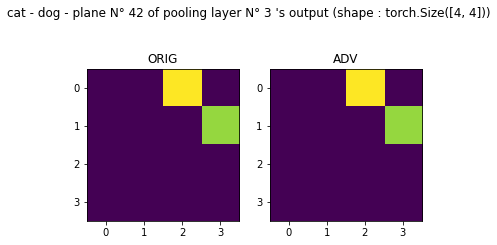

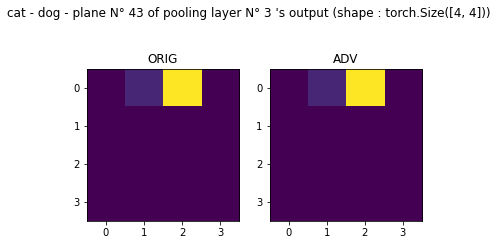

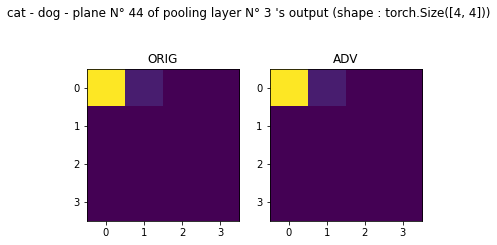

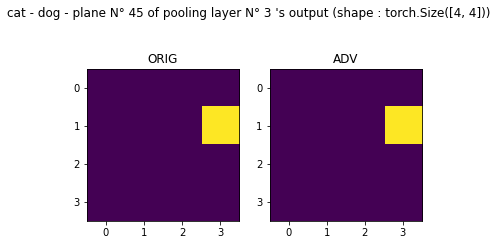

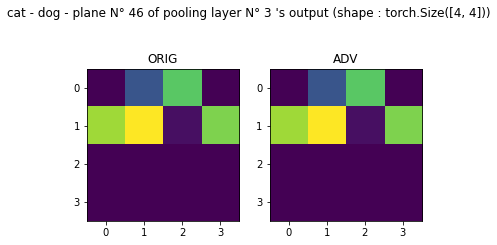

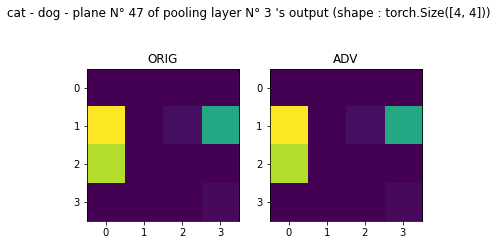

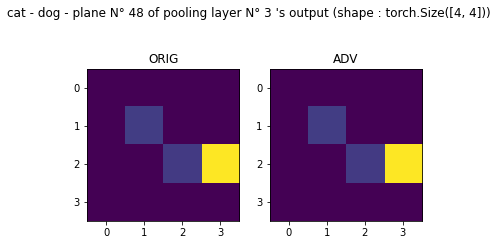

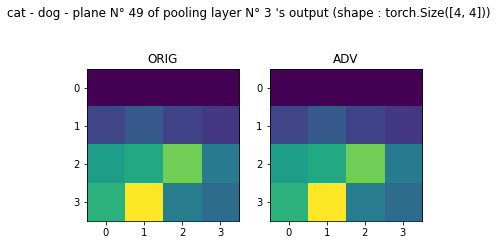

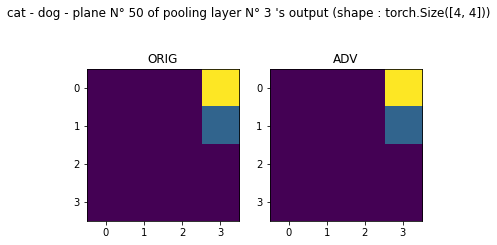

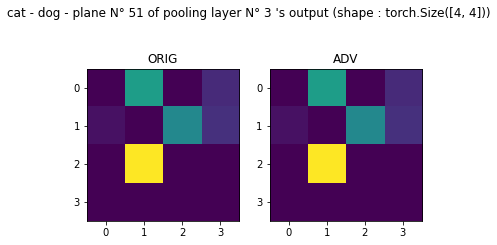

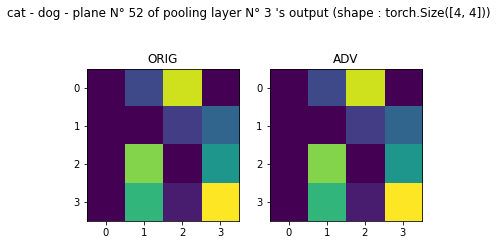

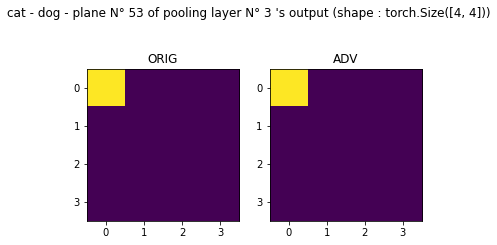

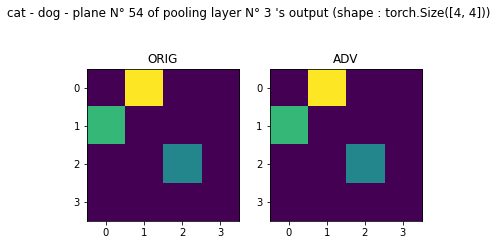

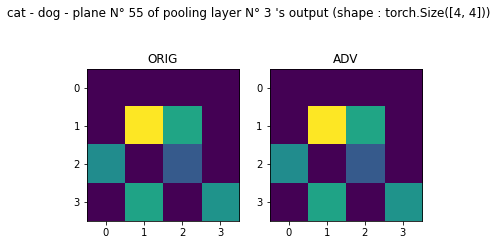

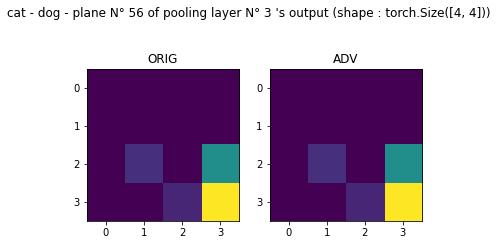

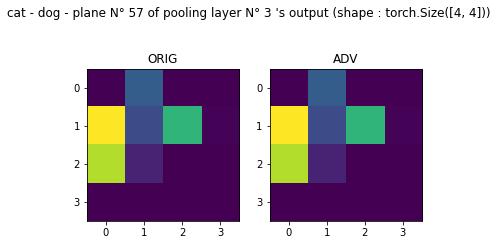

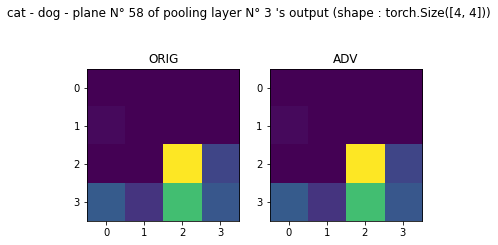

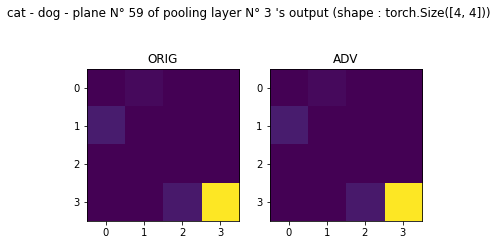

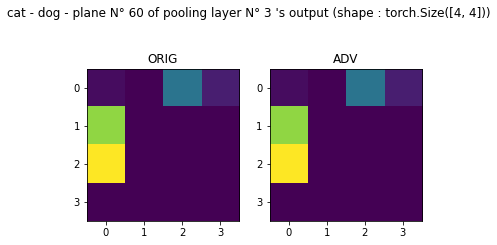

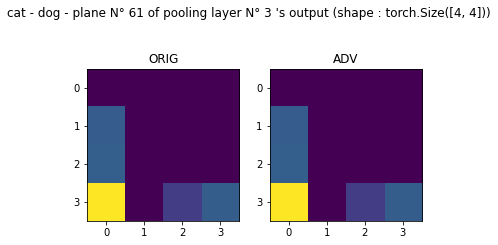

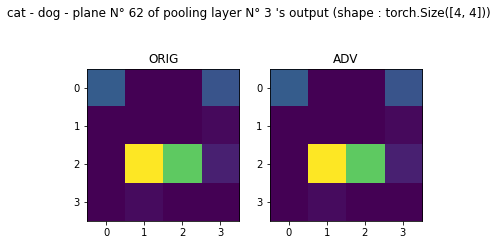

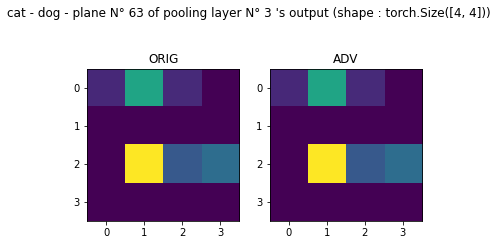

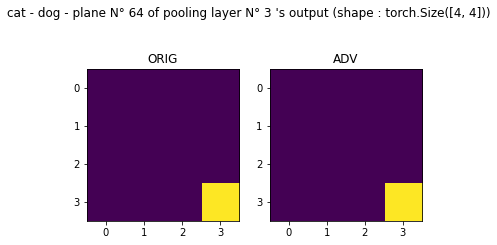

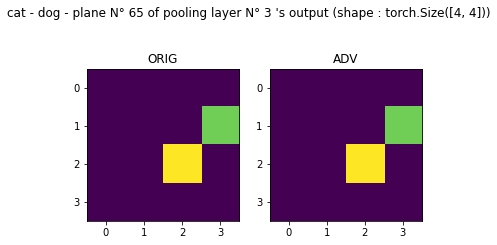

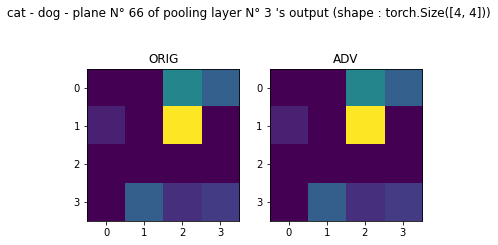

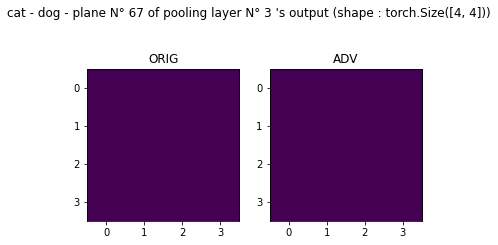

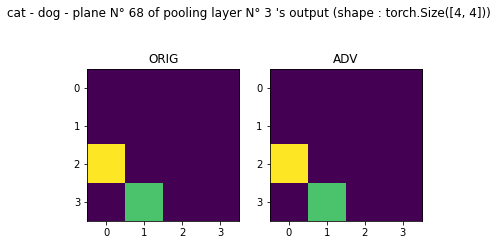

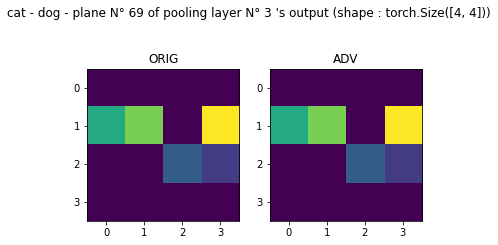

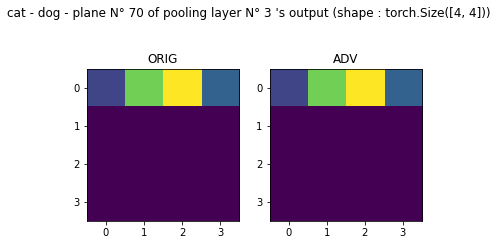

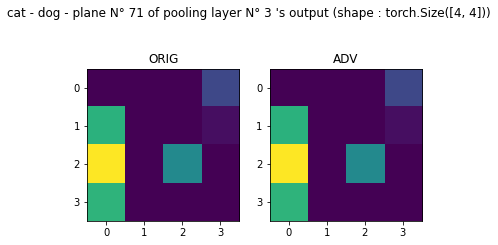

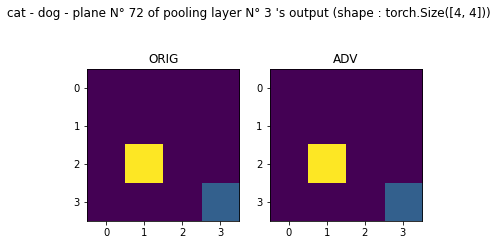

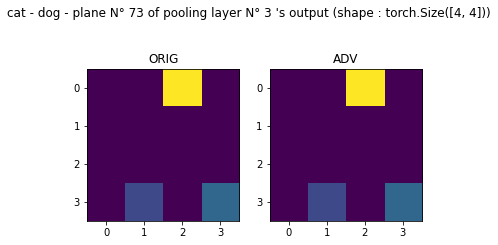

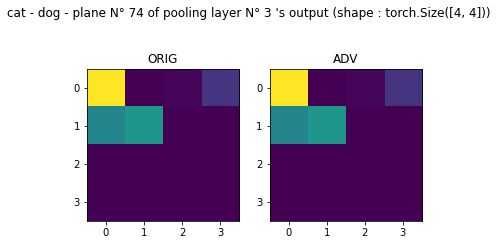

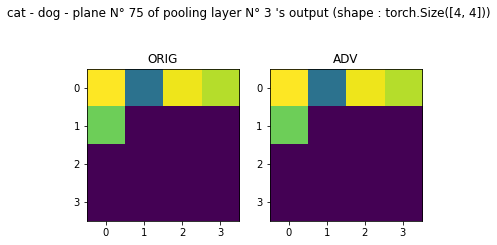

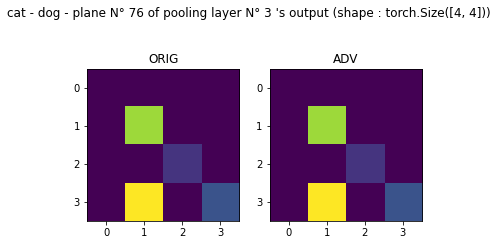

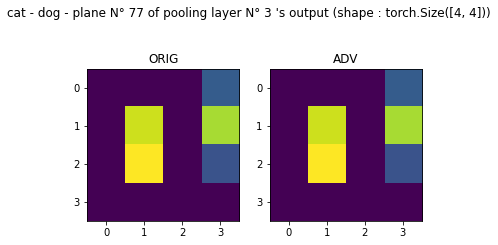

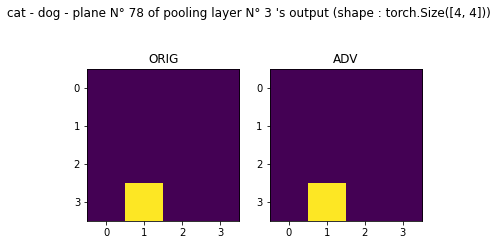

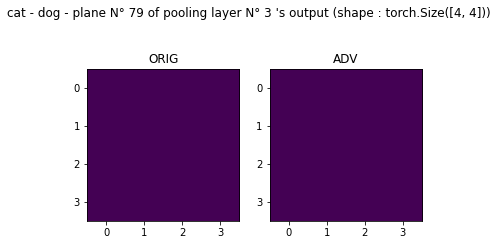

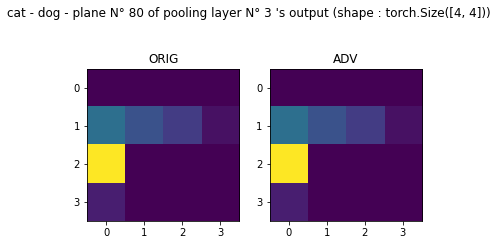

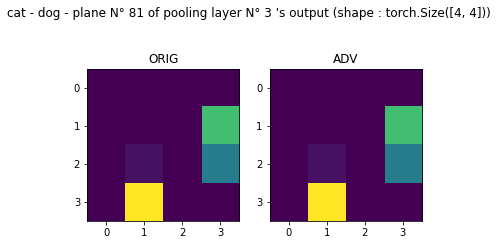

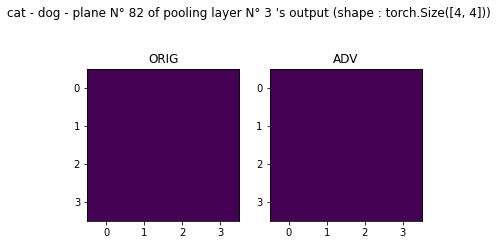

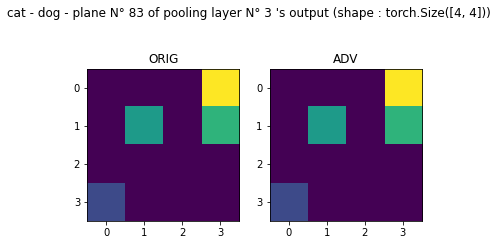

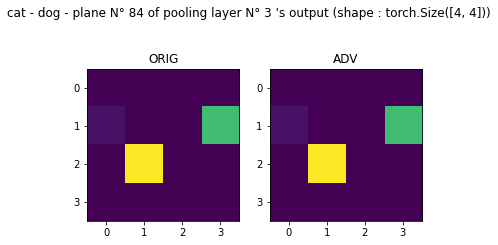

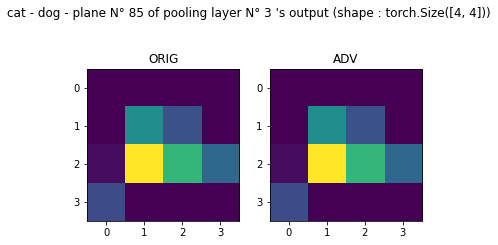

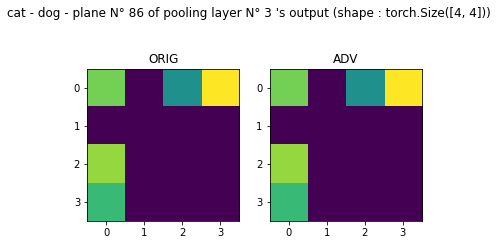

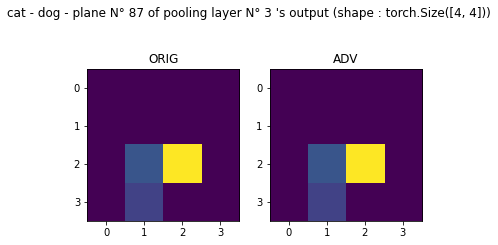

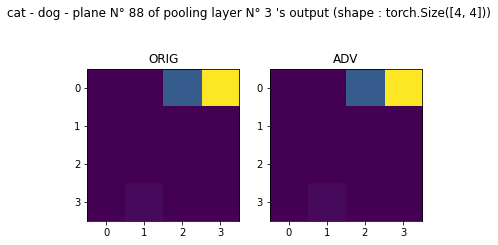

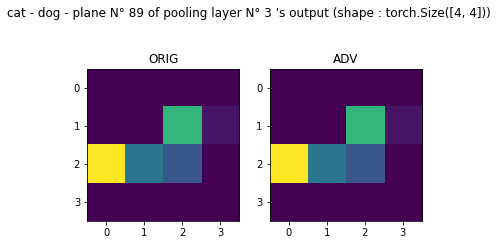

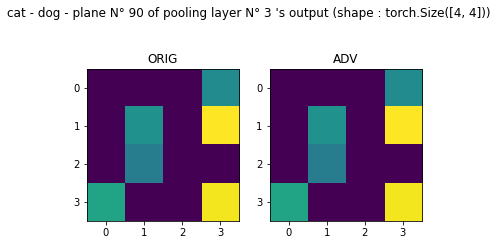

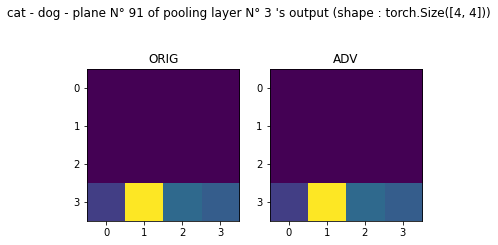

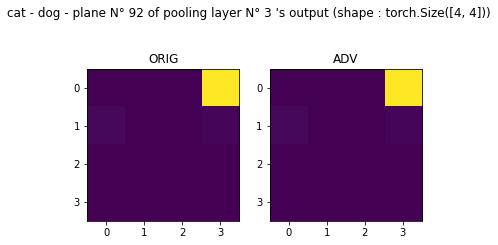

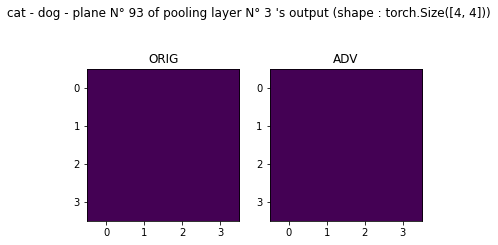

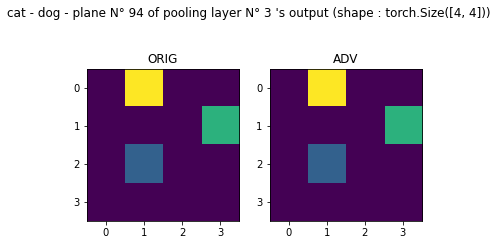

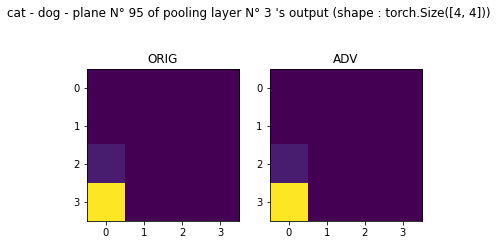

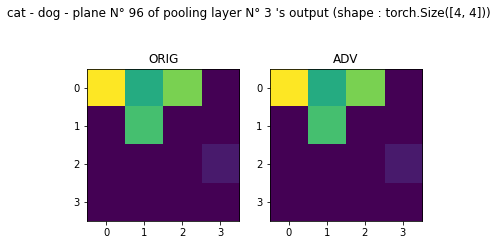

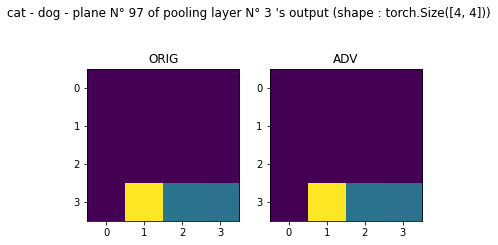

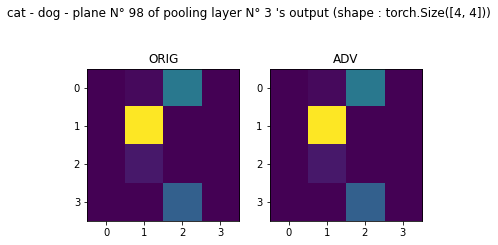

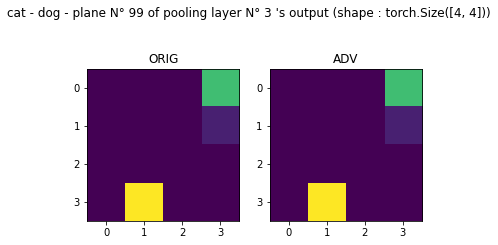

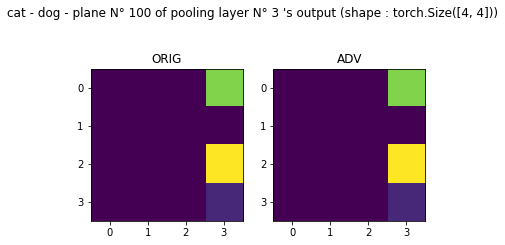

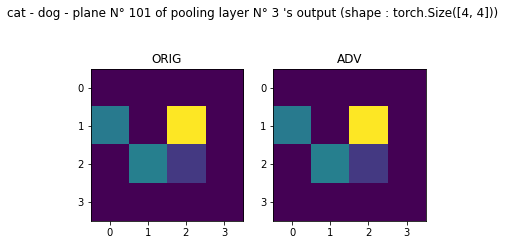

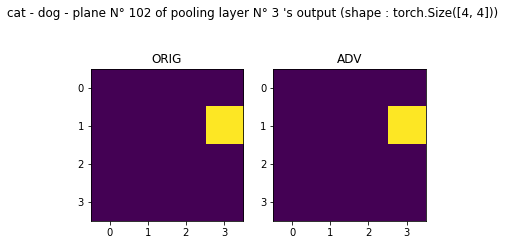

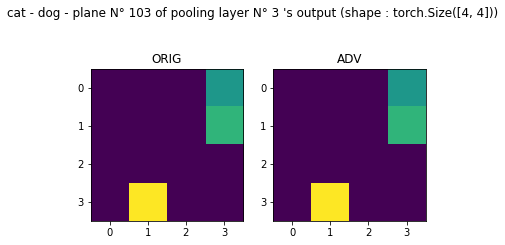

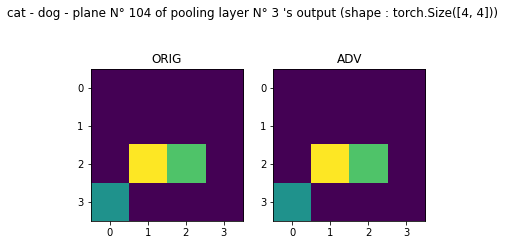

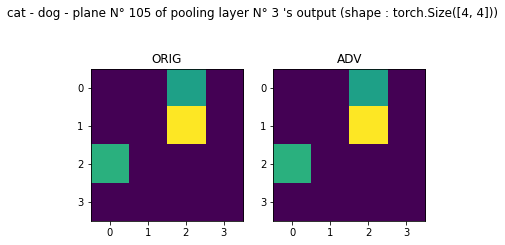

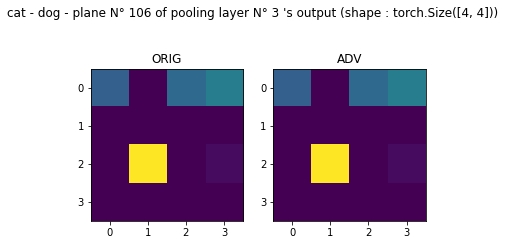

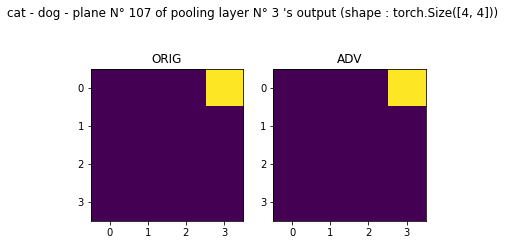

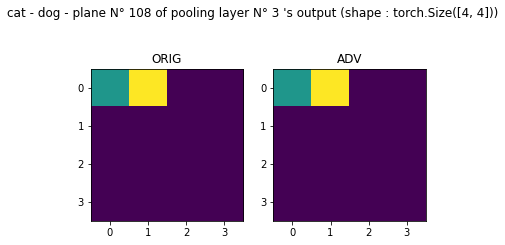

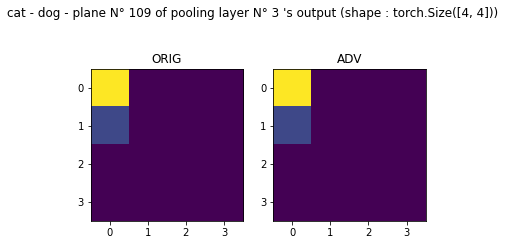

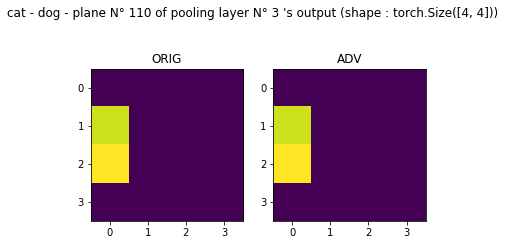

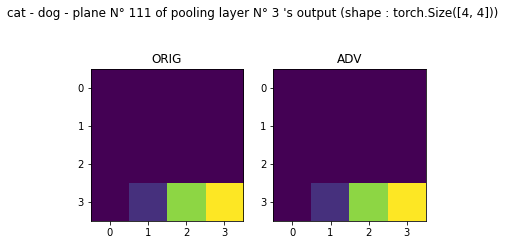

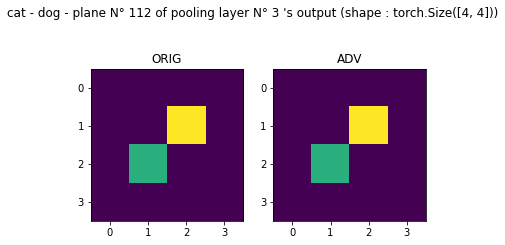

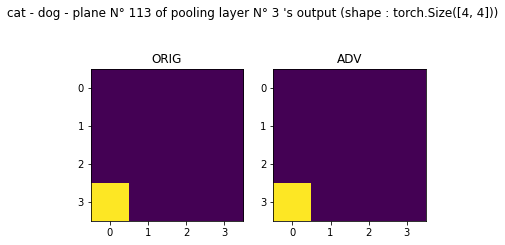

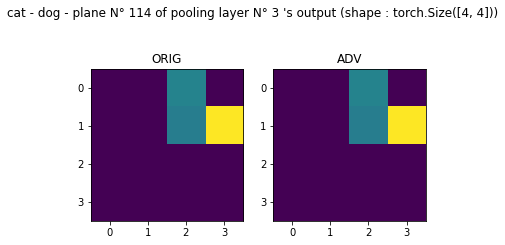

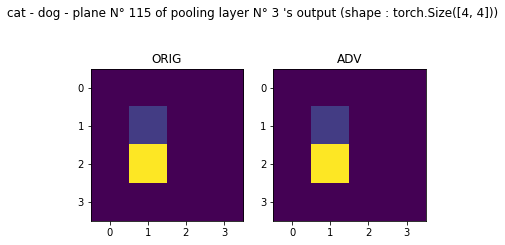

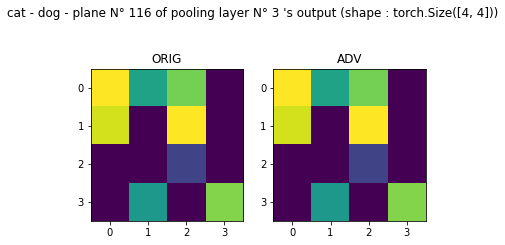

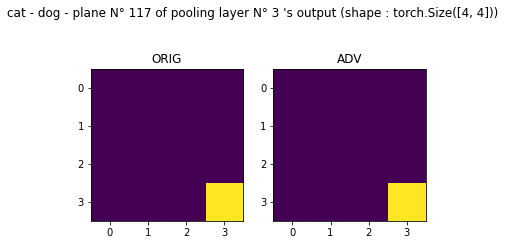

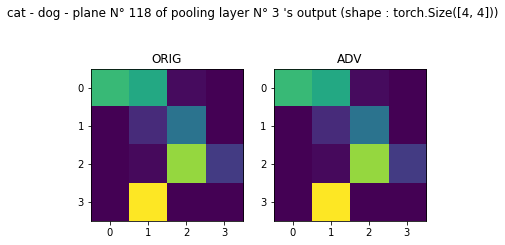

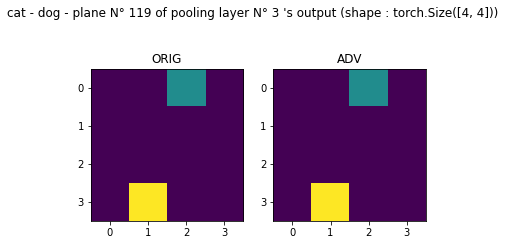

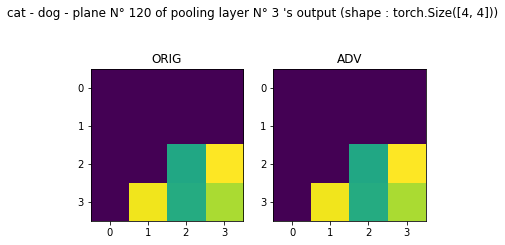

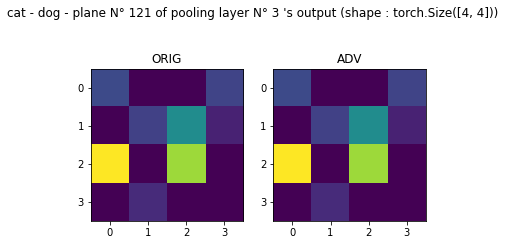

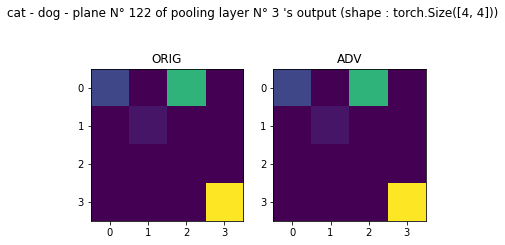

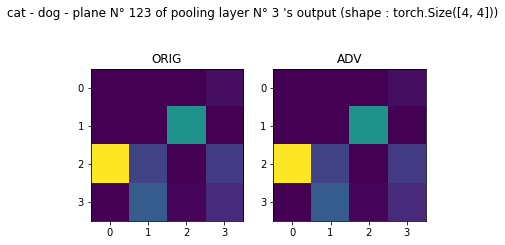

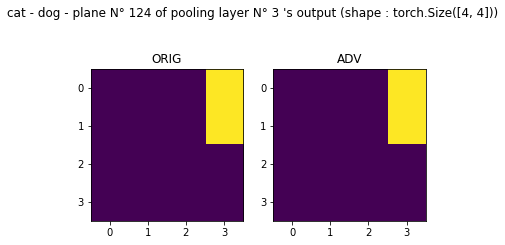

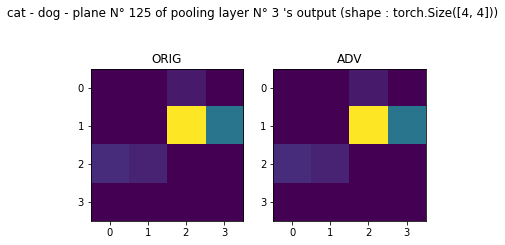

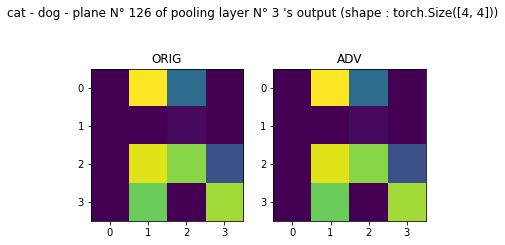

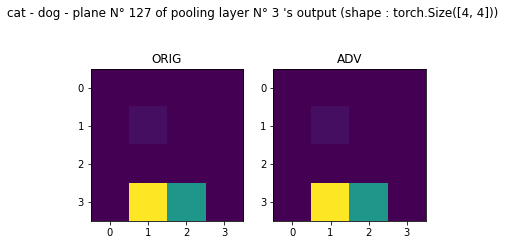

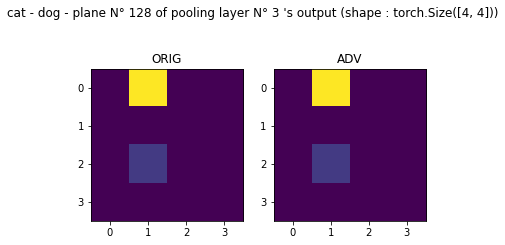

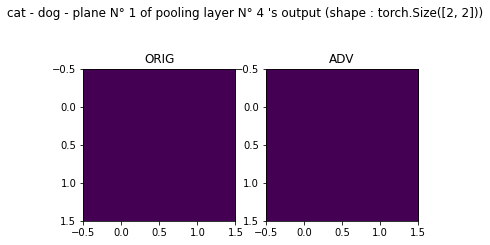

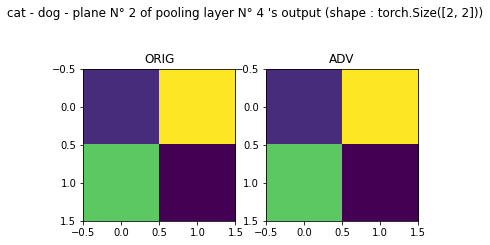

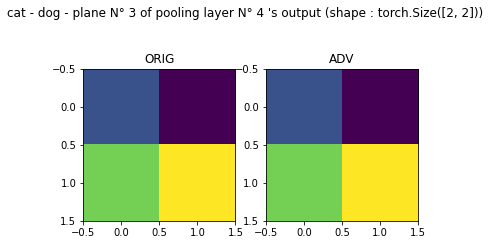

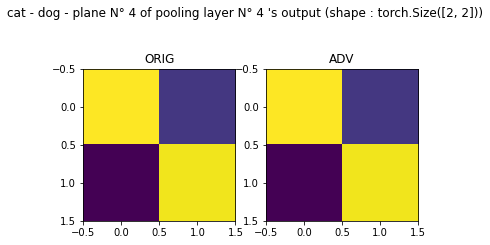

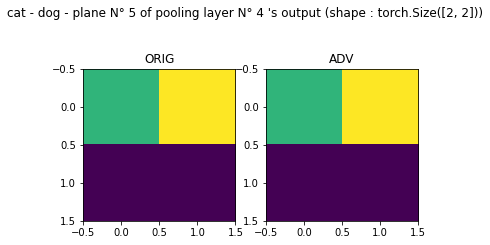

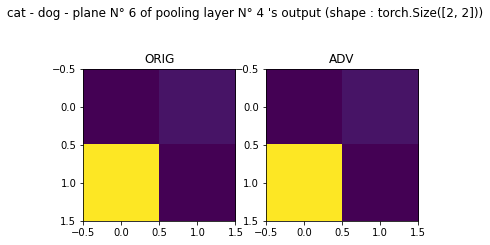

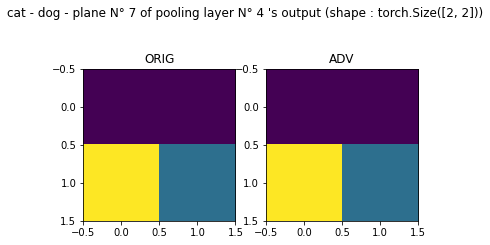

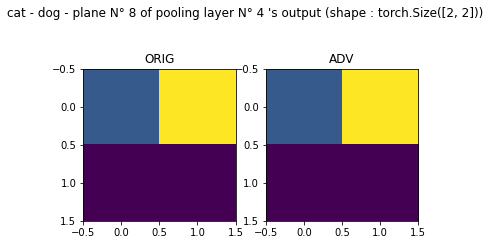

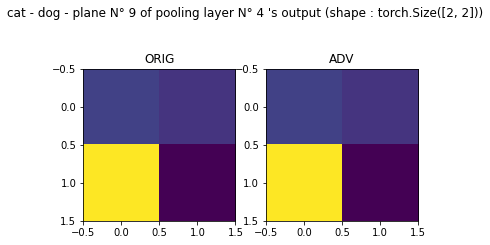

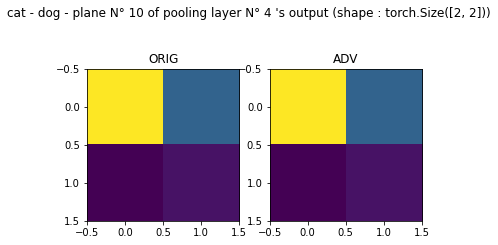

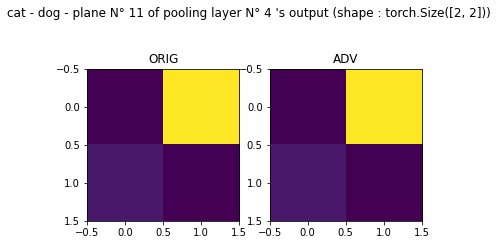

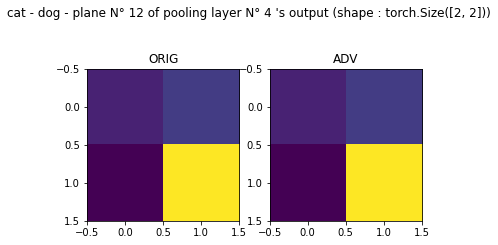

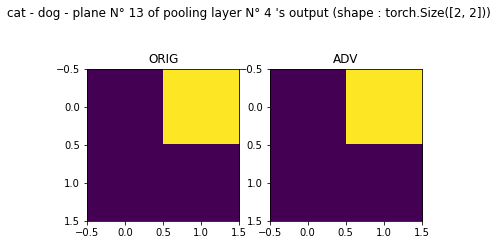

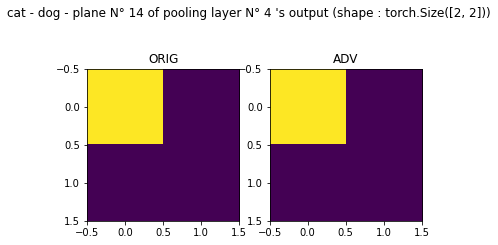

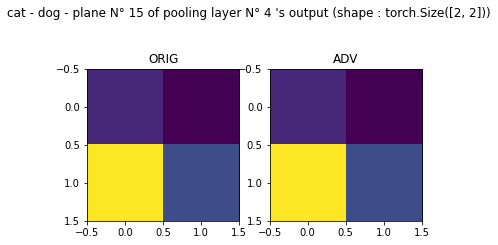

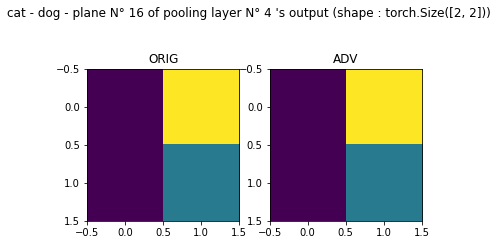

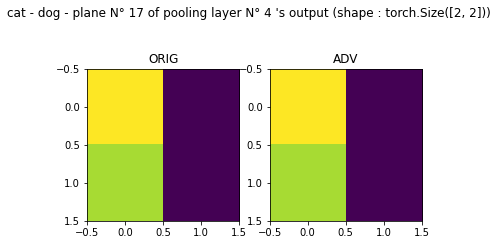

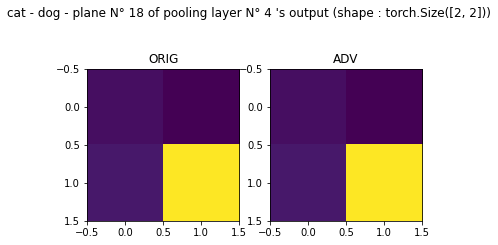

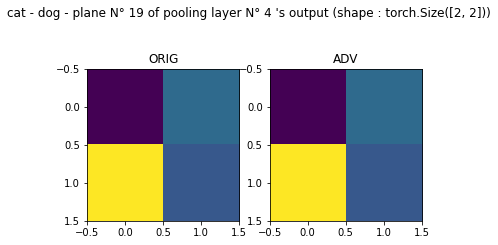

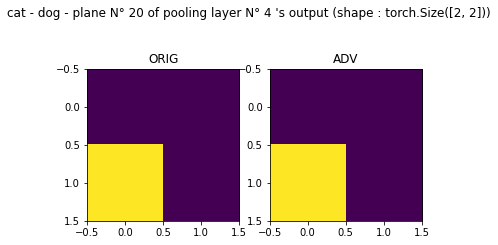

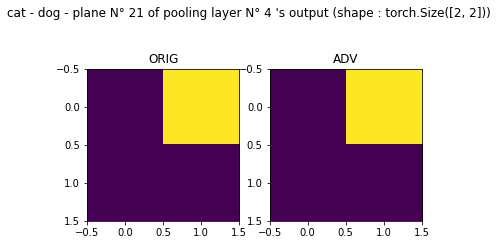

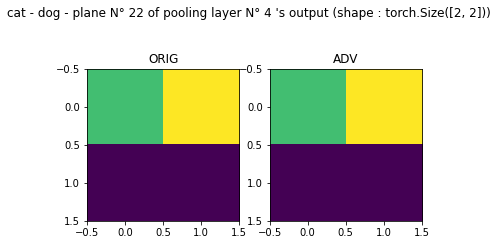

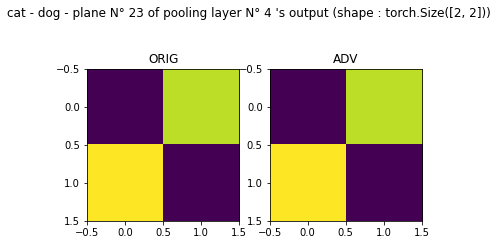

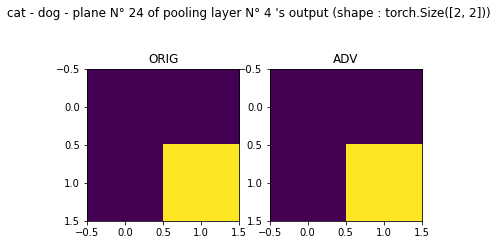

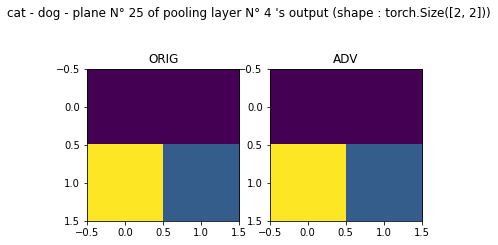

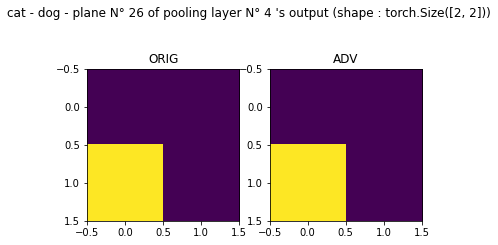

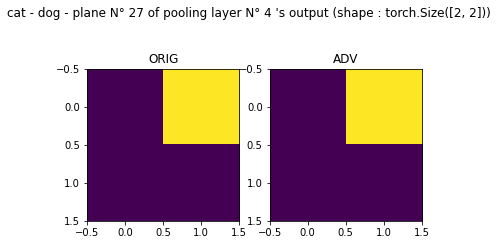

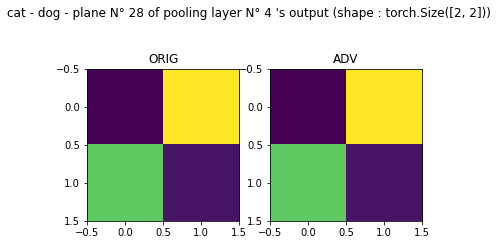

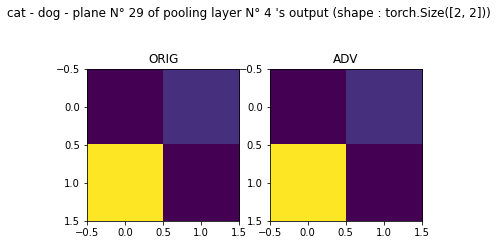

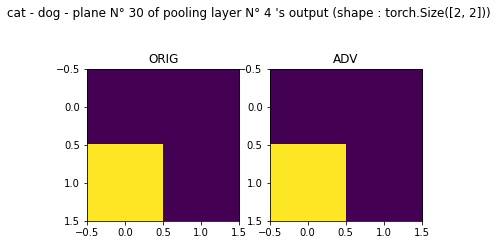

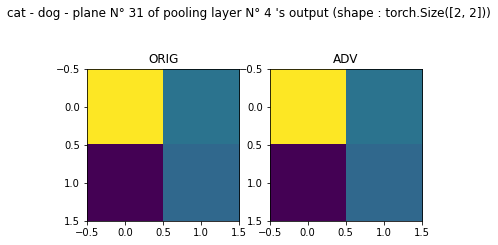

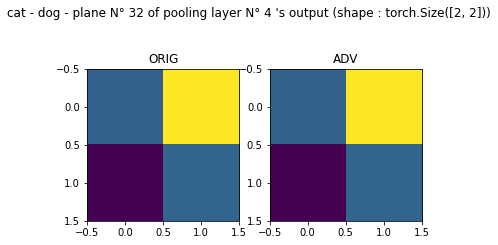

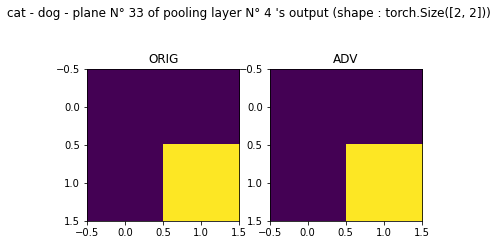

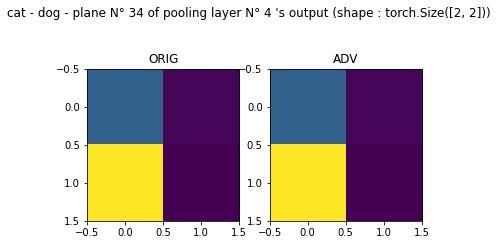

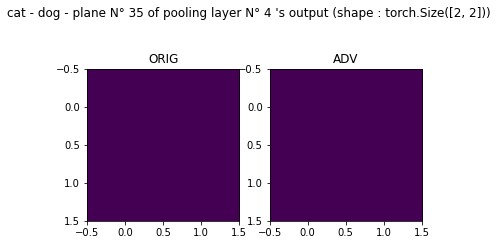

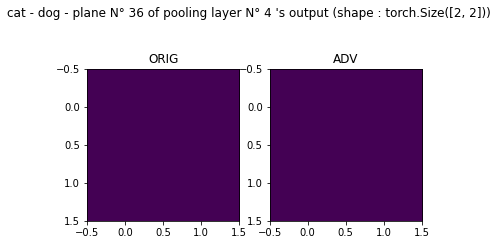

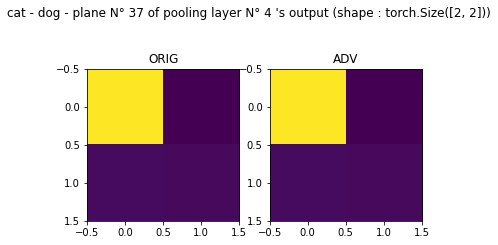

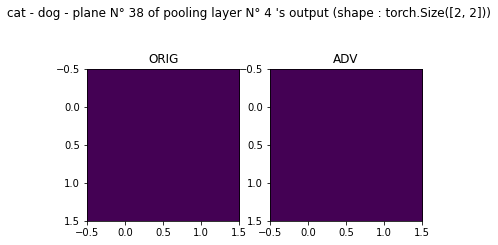

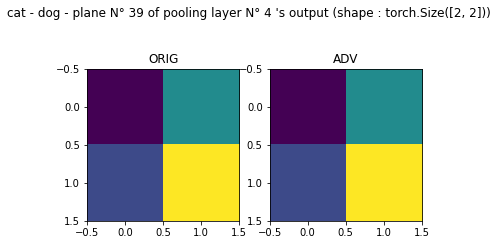

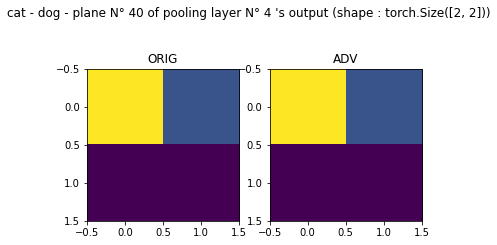

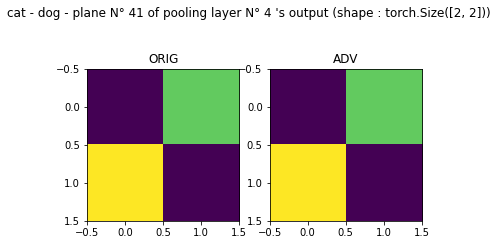

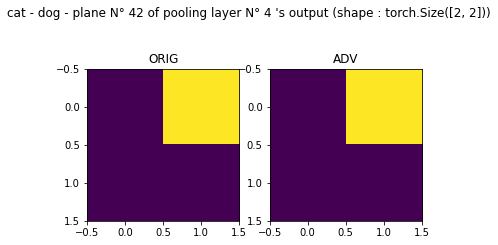

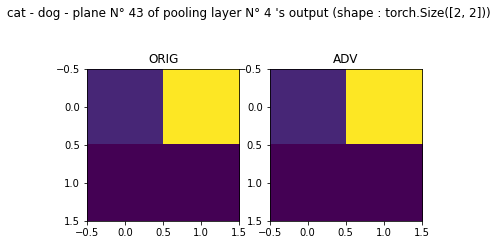

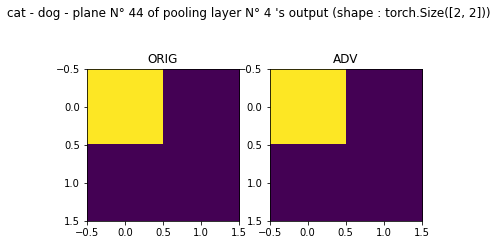

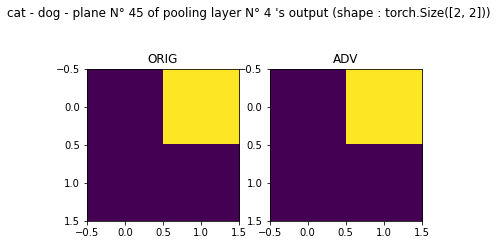

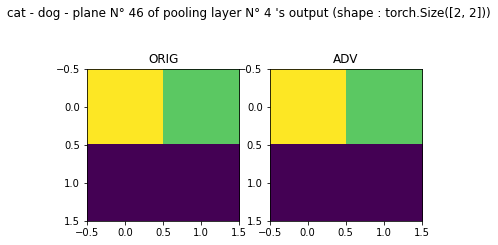

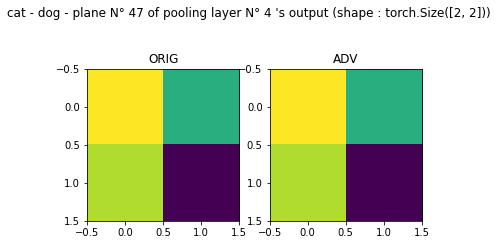

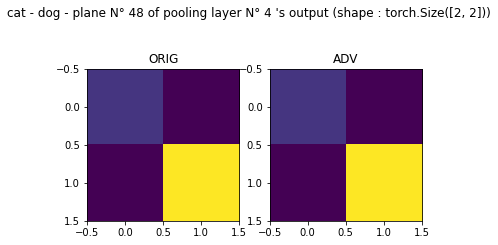

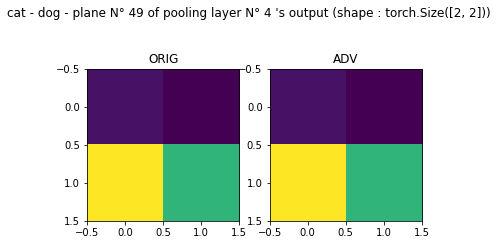

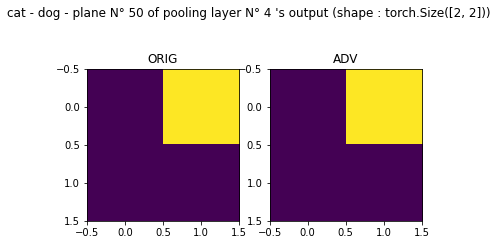

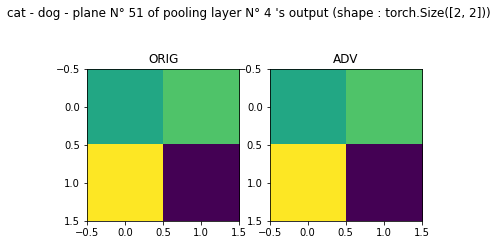

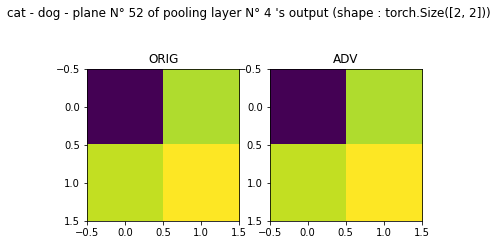

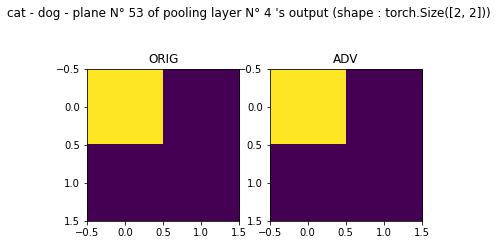

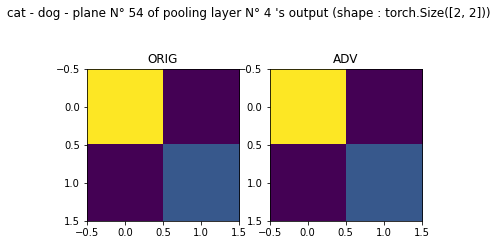

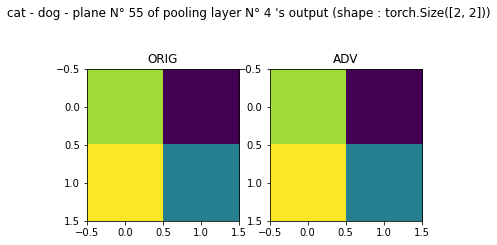

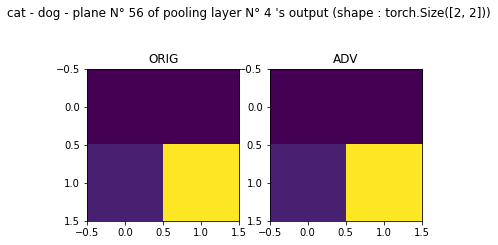

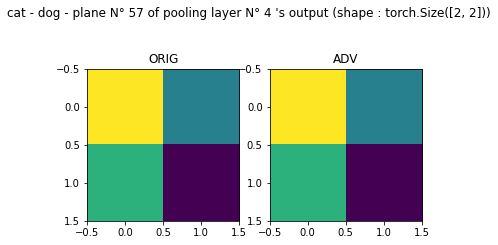

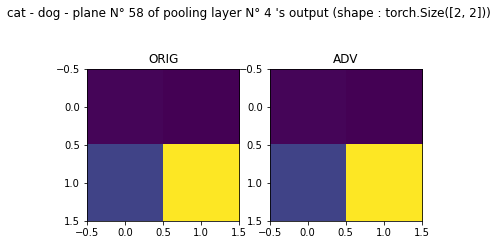

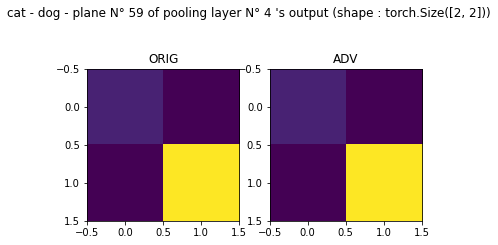

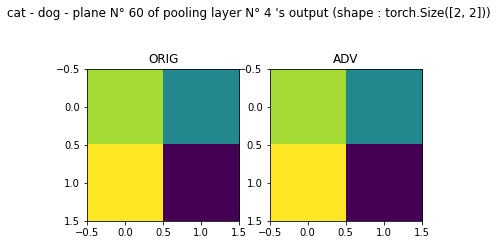

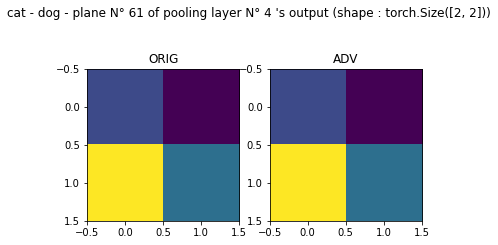

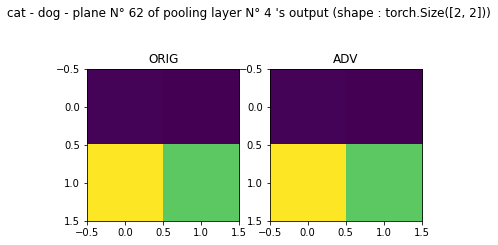

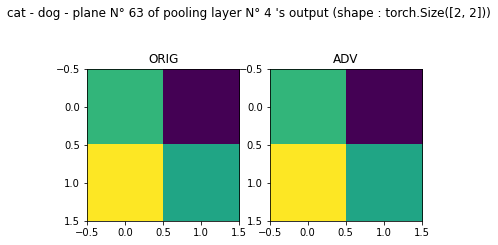

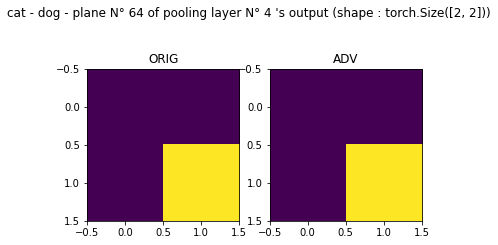

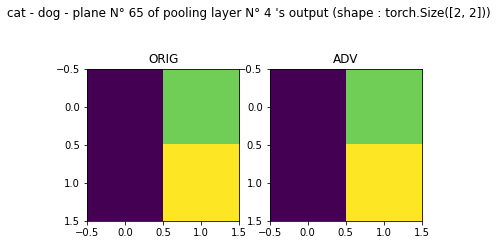

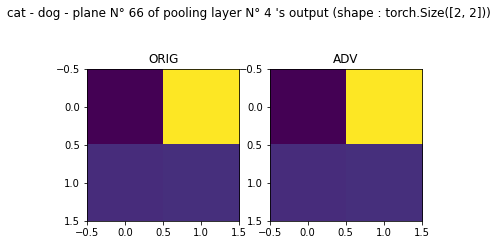

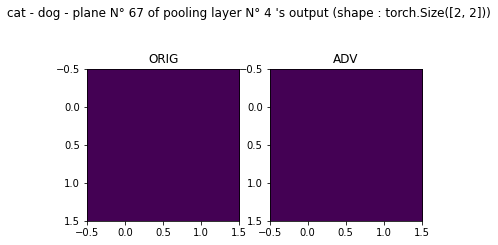

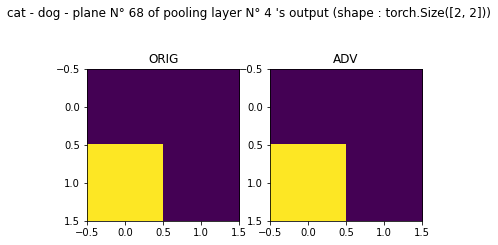

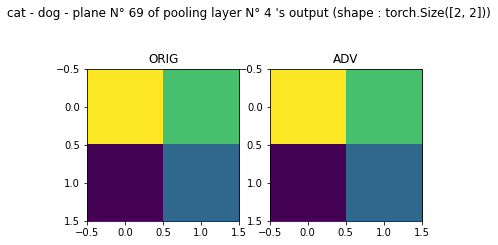

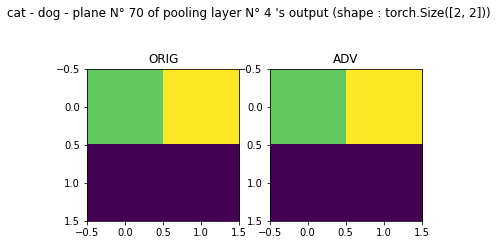

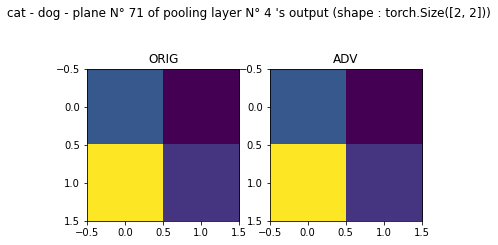

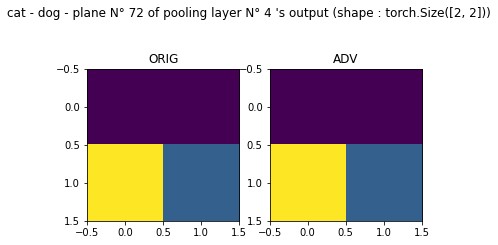

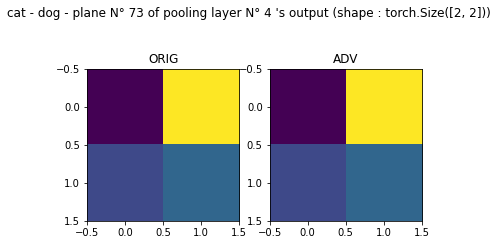

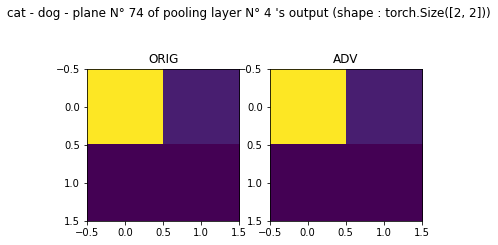

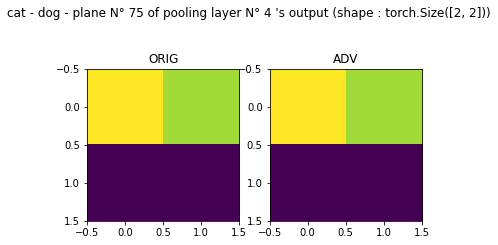

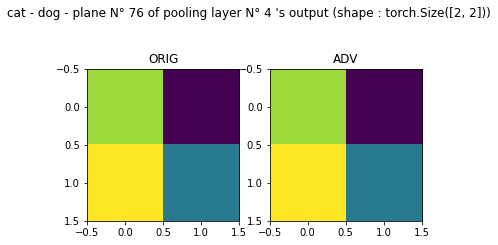

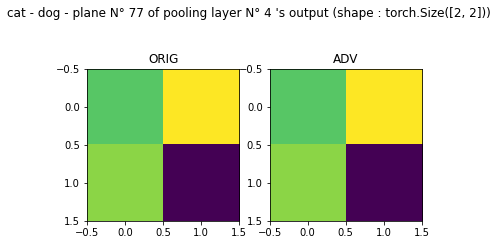

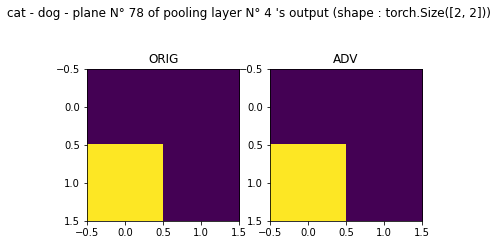

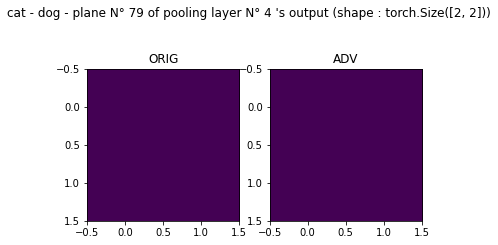

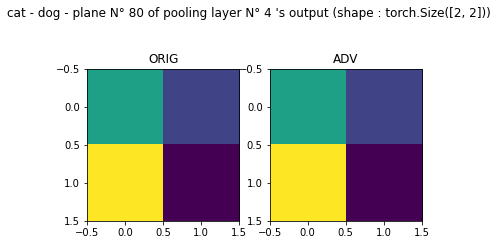

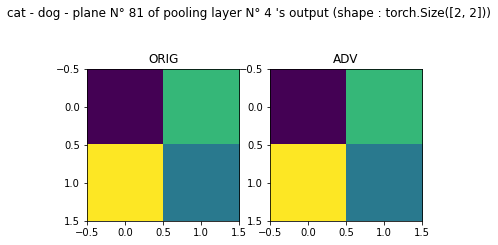

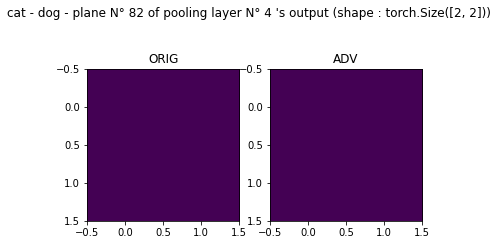

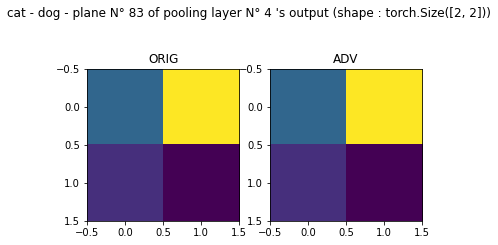

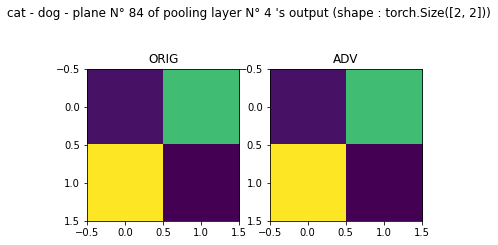

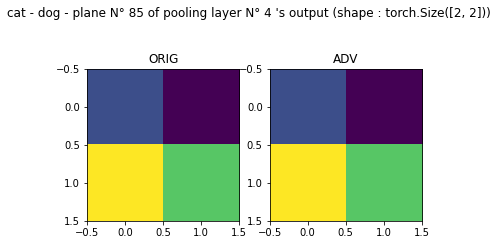

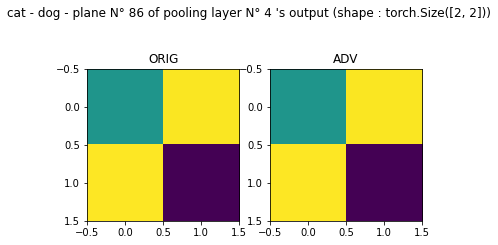

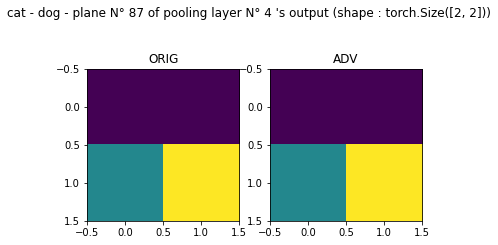

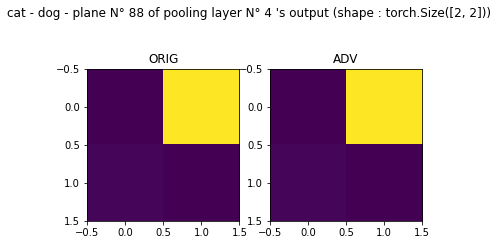

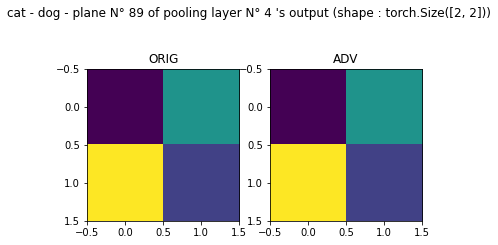

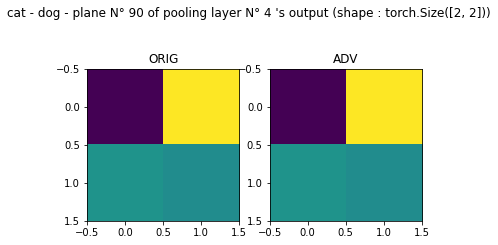

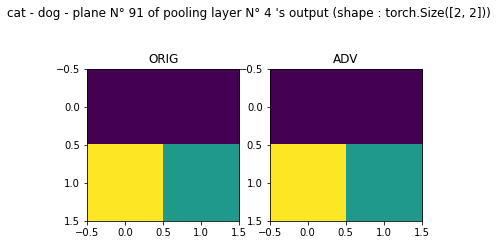

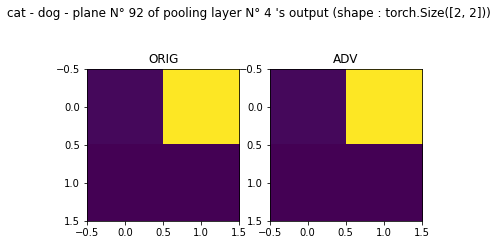

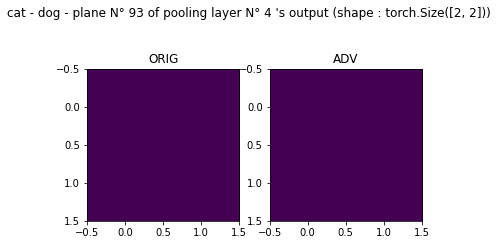

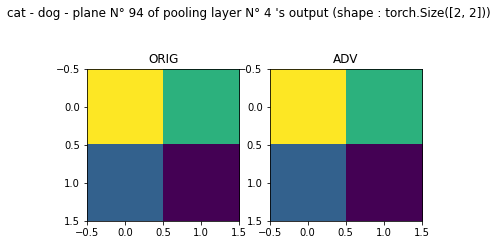

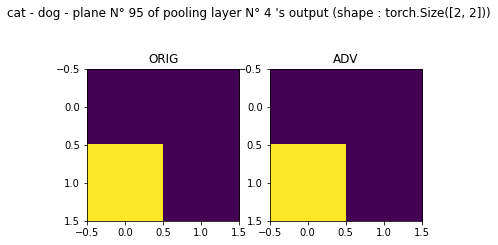

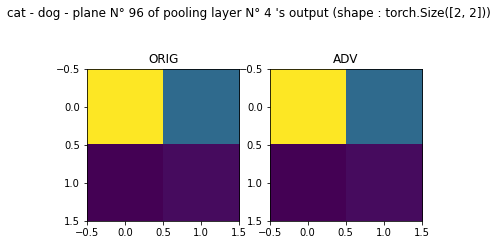

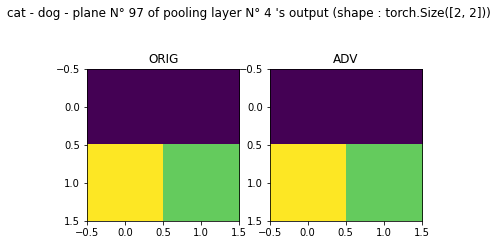

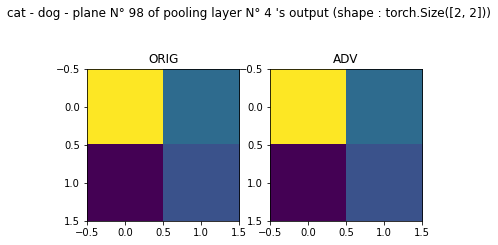

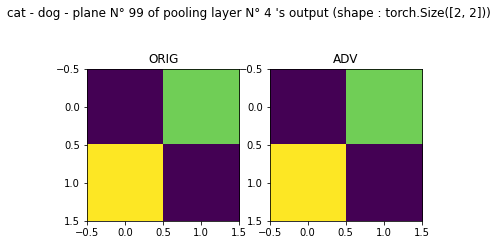

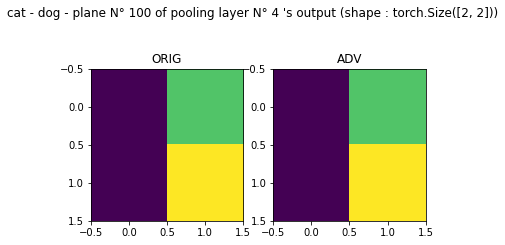

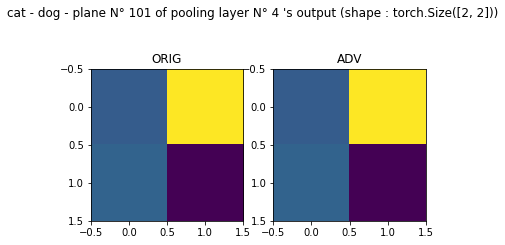

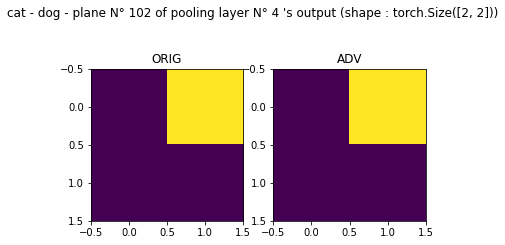

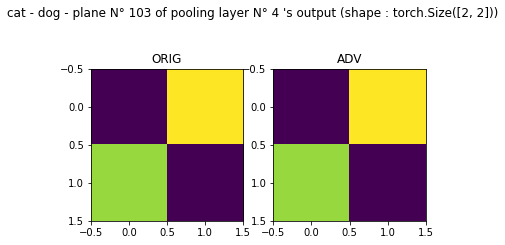

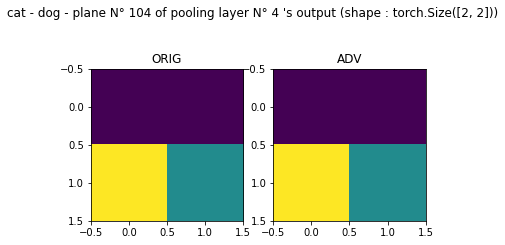

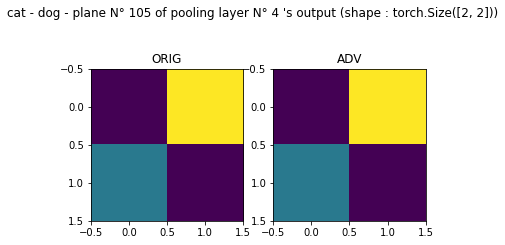

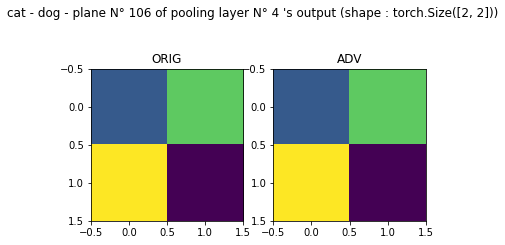

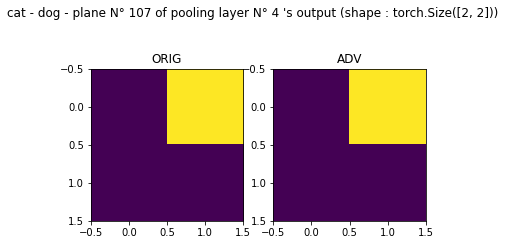

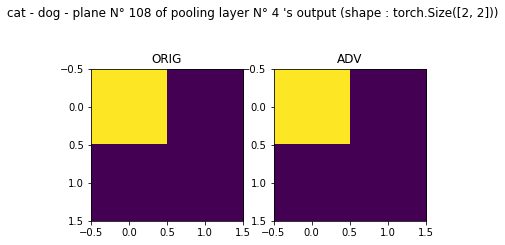

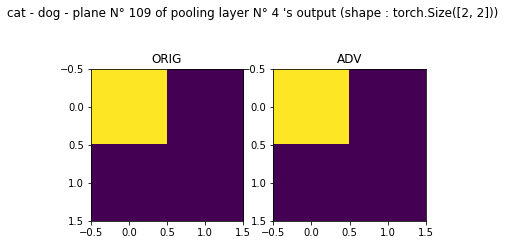

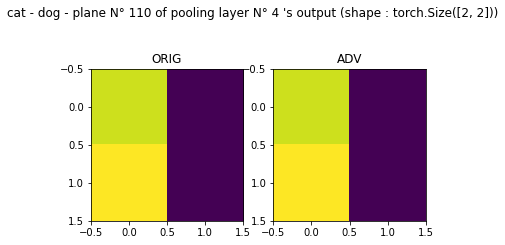

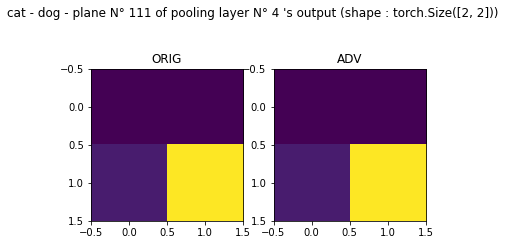

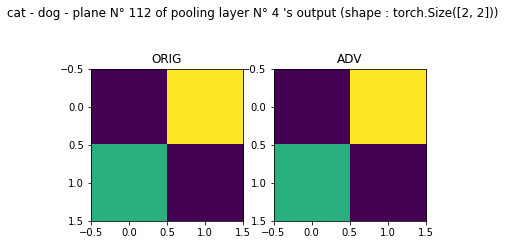

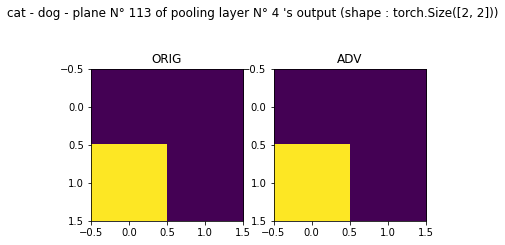

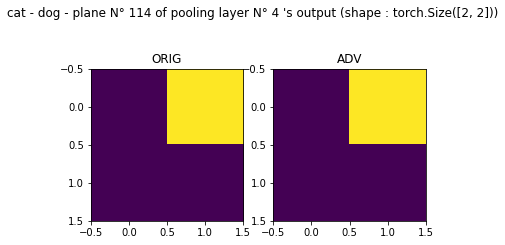

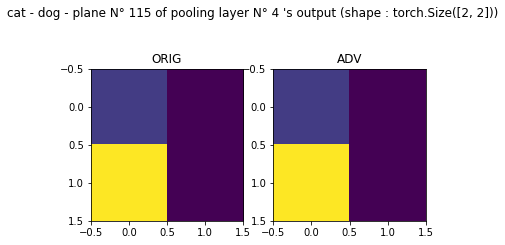

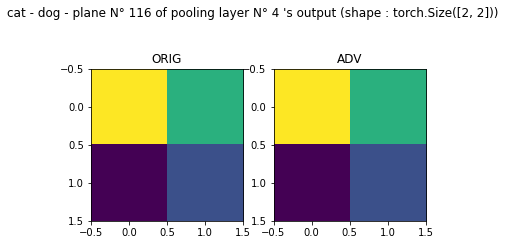

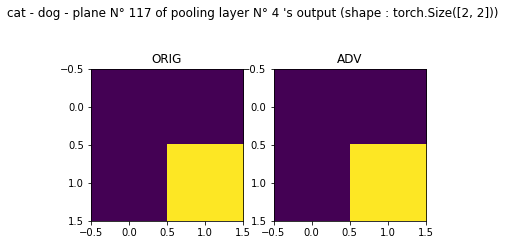

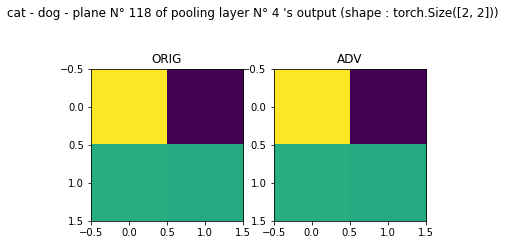

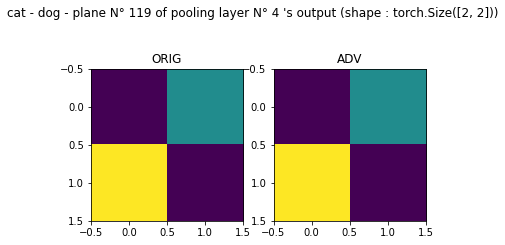

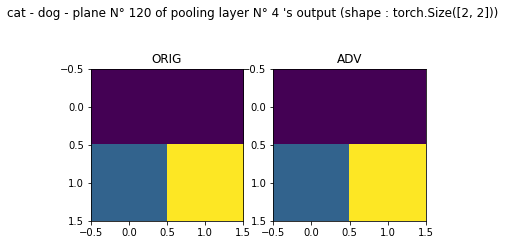

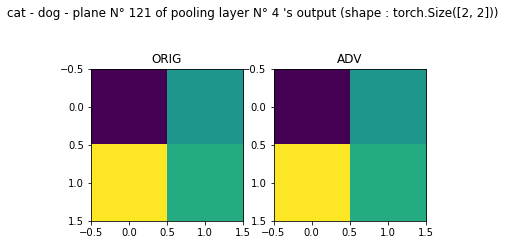

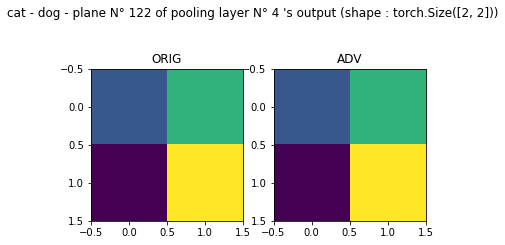

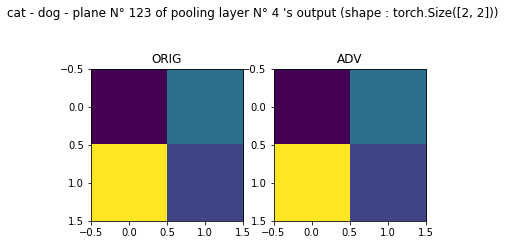

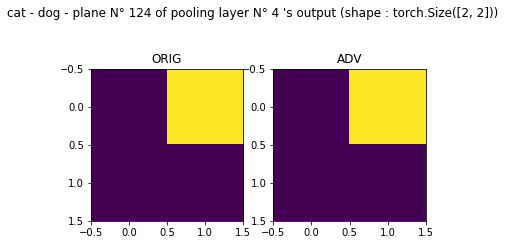

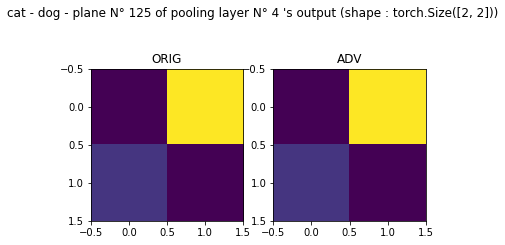

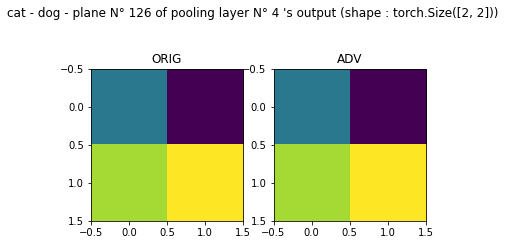

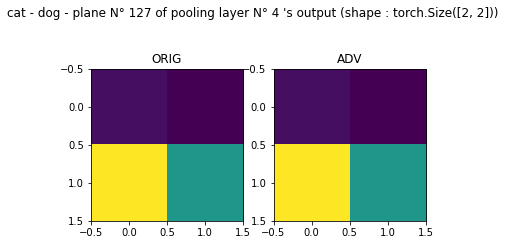

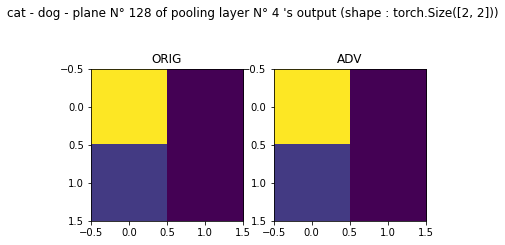

___________________________________________________________________________________
---------------------------  Indentified as  ship ----------------------------
-----------------  Adversarial version identified as  ship -----------------


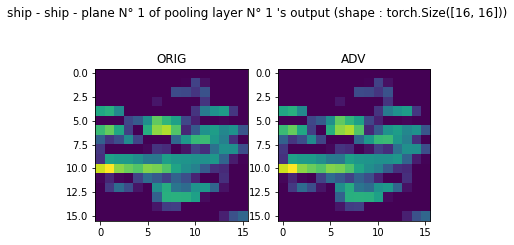

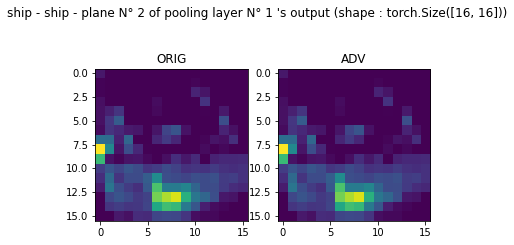

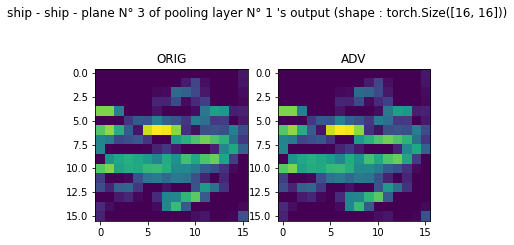

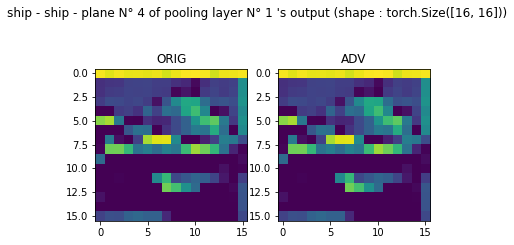

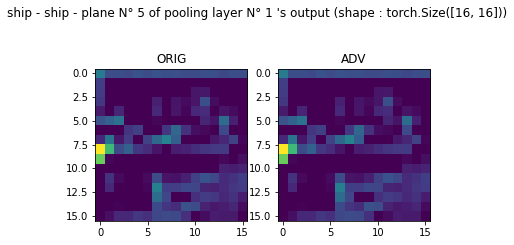

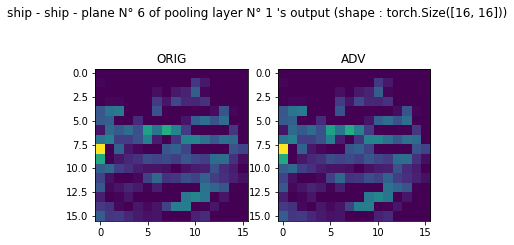

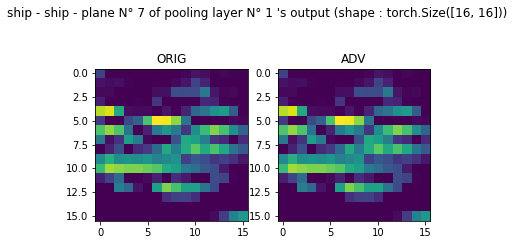

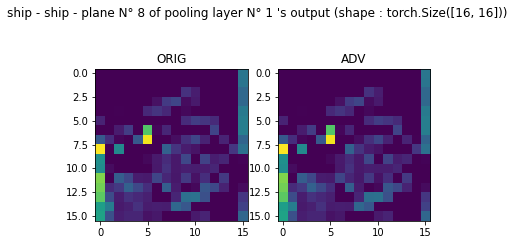

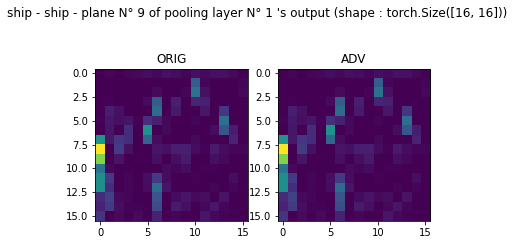

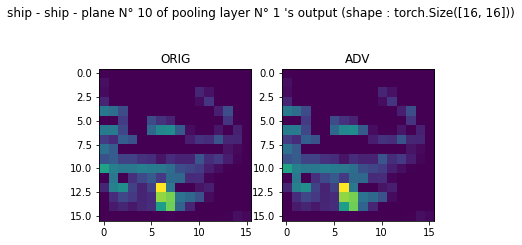

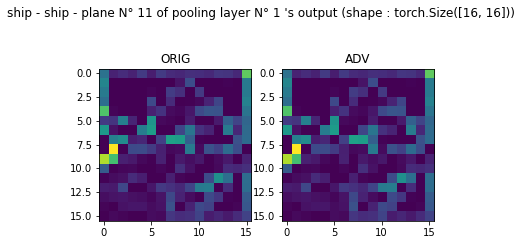

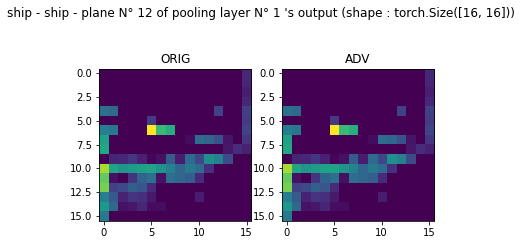

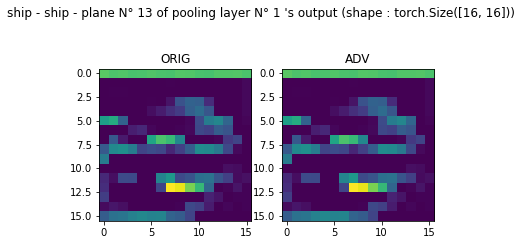

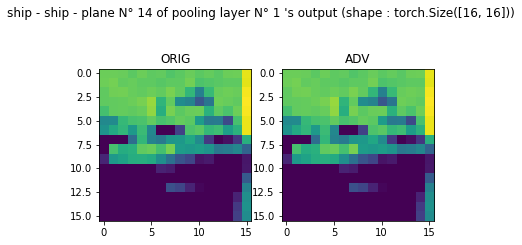

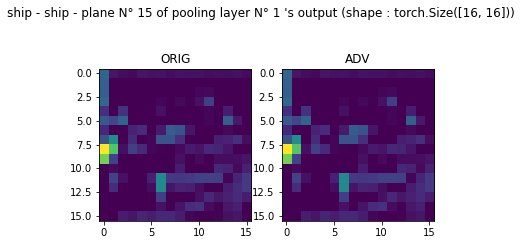

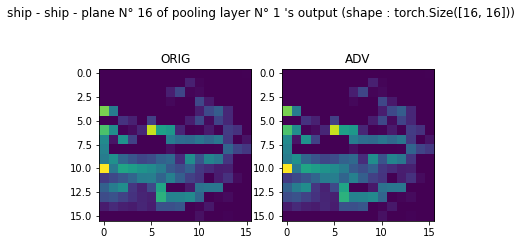

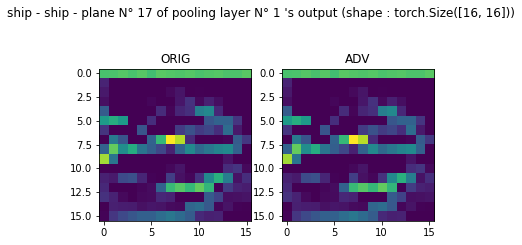

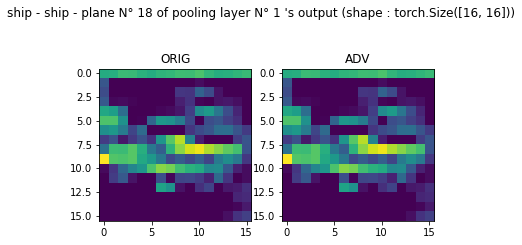

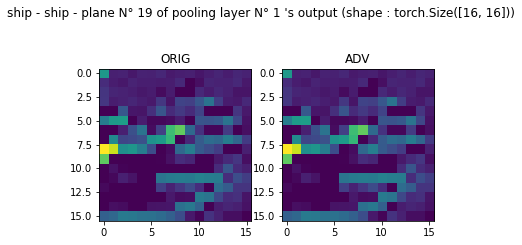

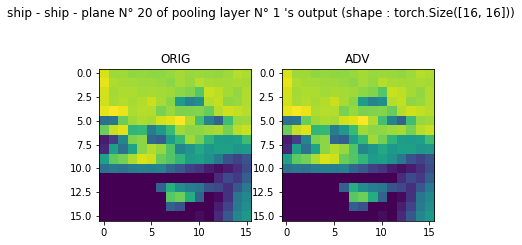

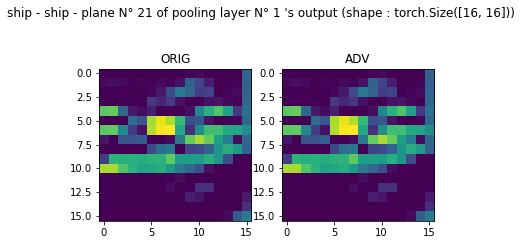

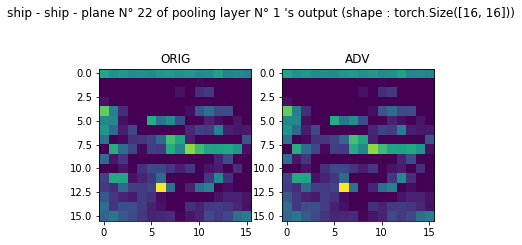

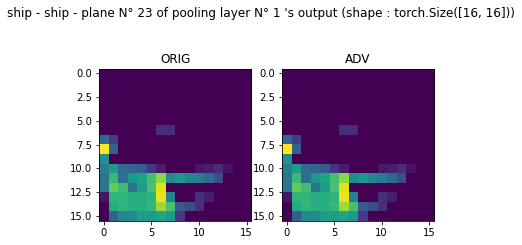

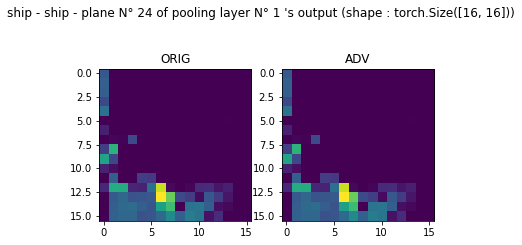

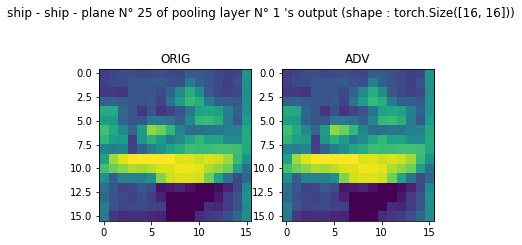

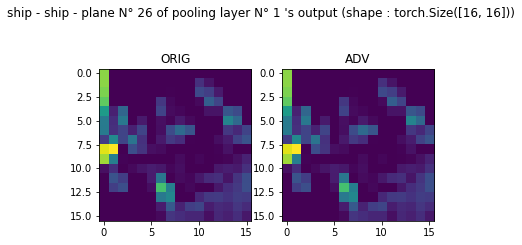

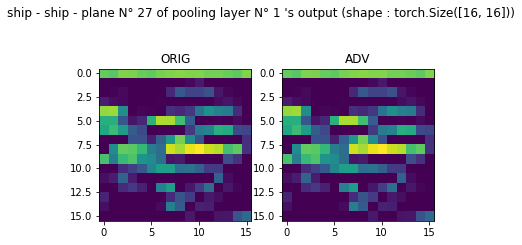

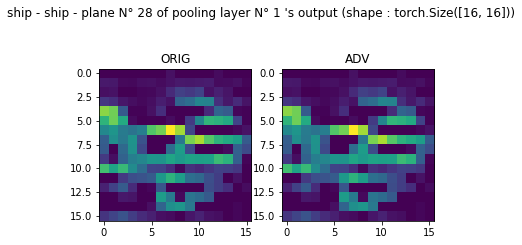

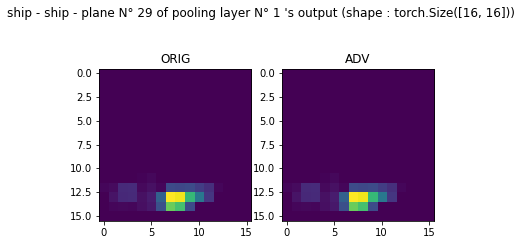

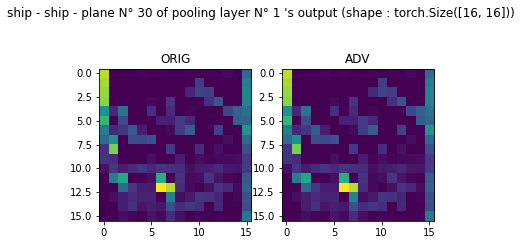

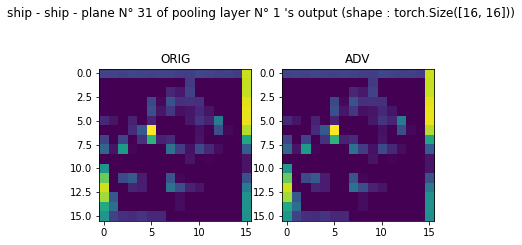

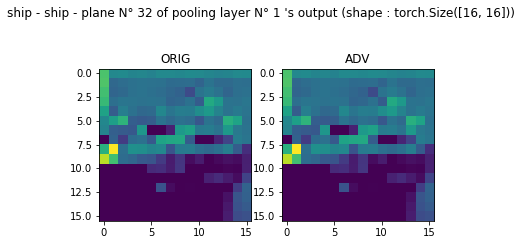

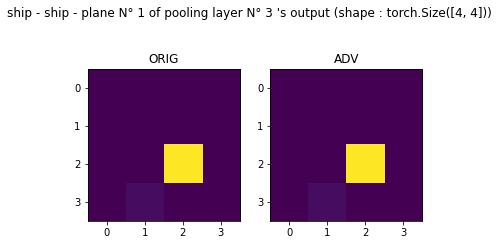

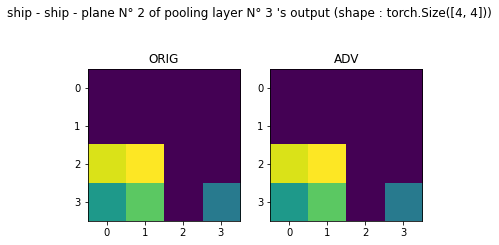

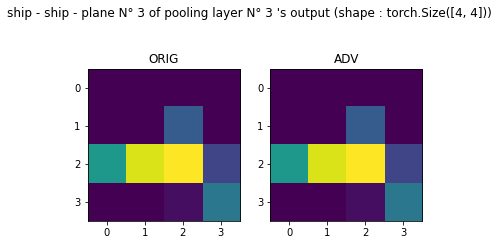

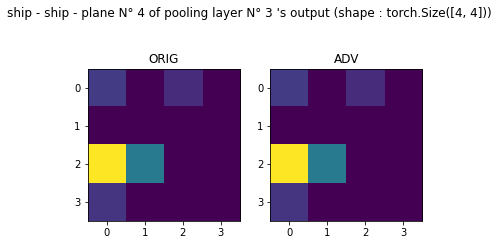

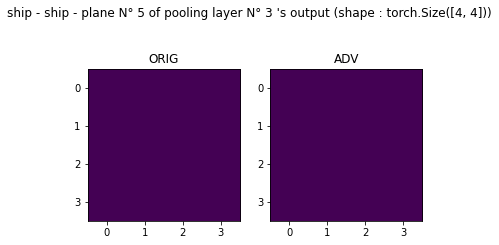

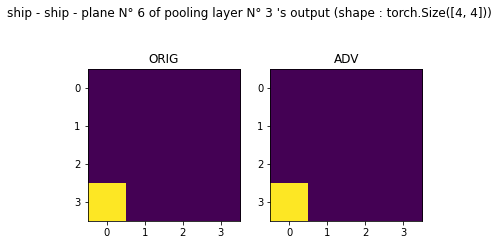

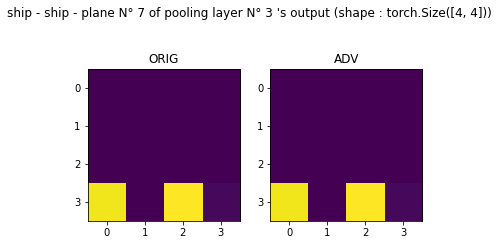

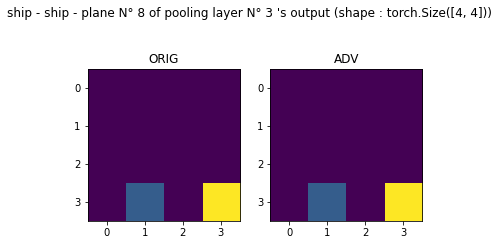

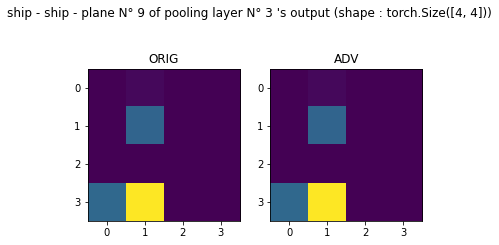

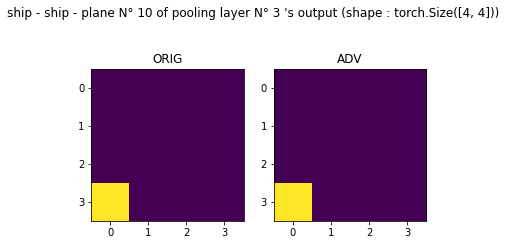

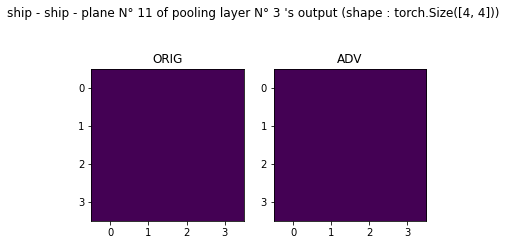

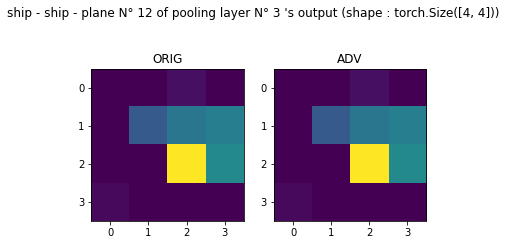

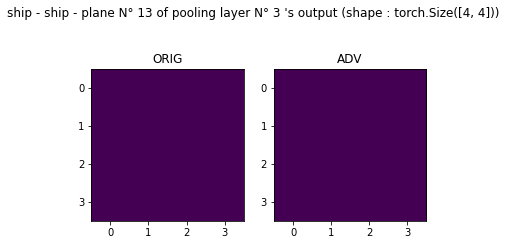

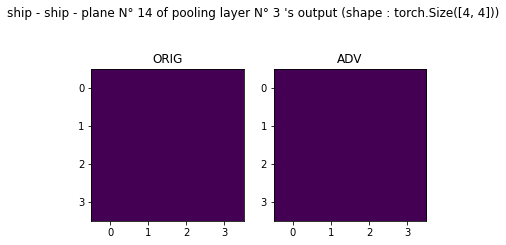

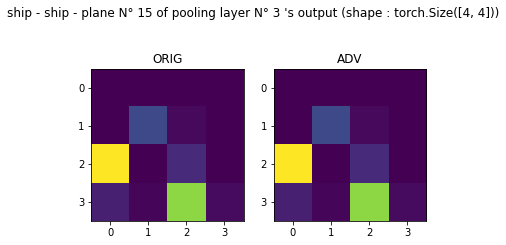

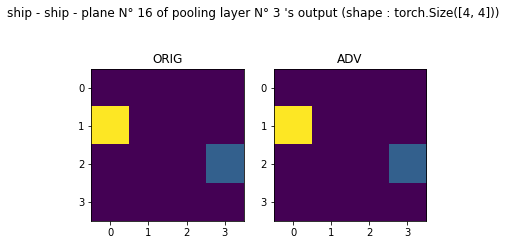

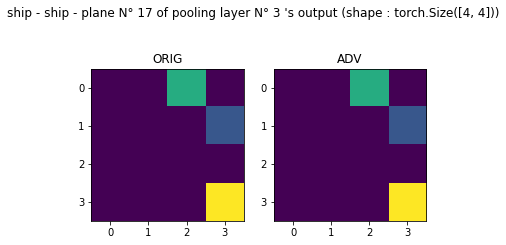

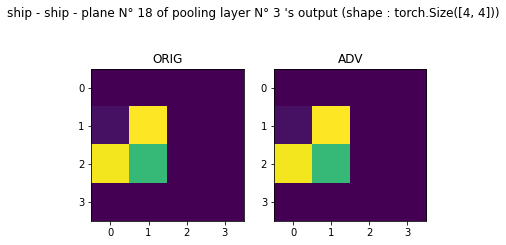

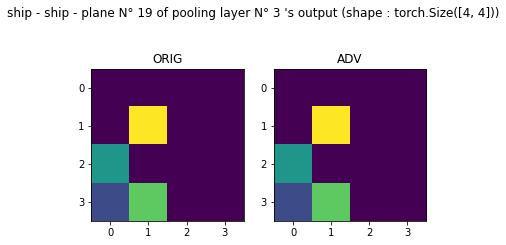

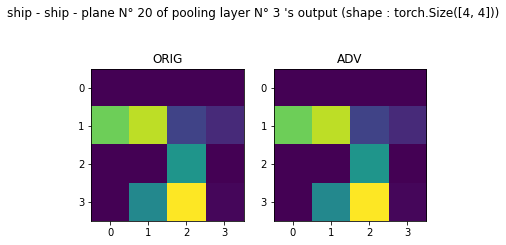

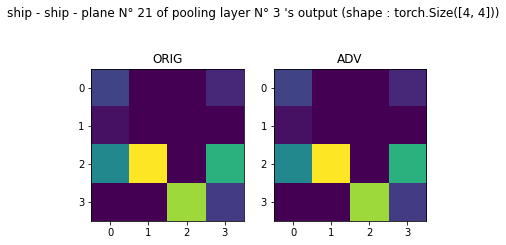

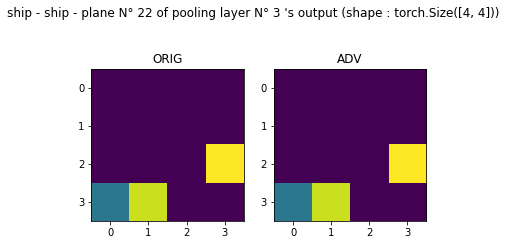

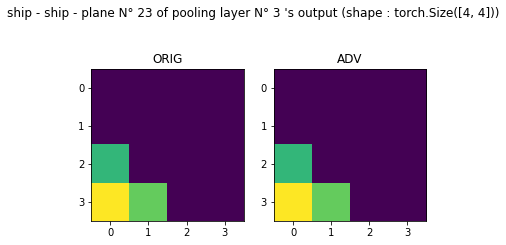

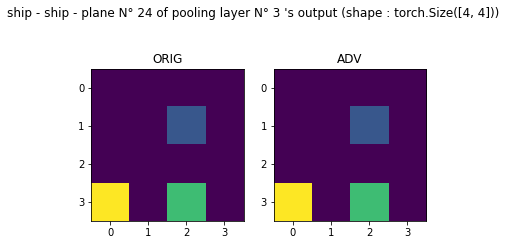

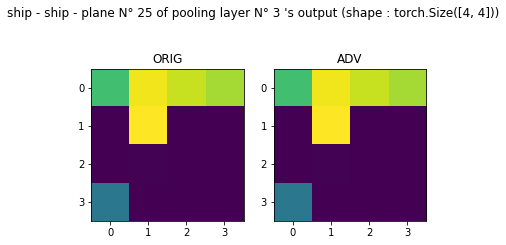

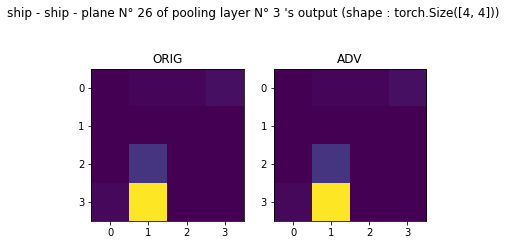

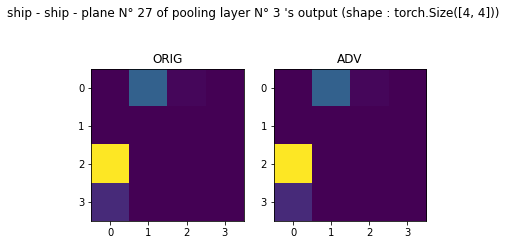

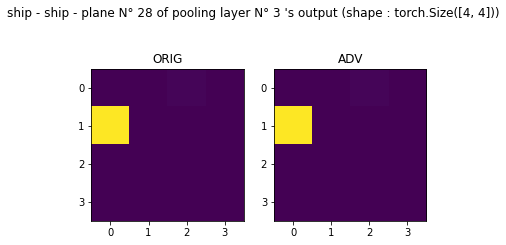

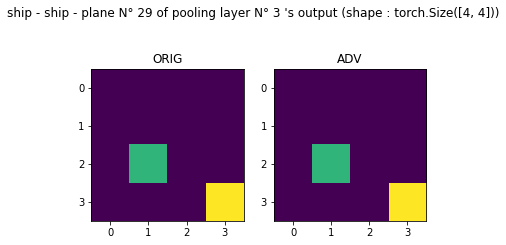

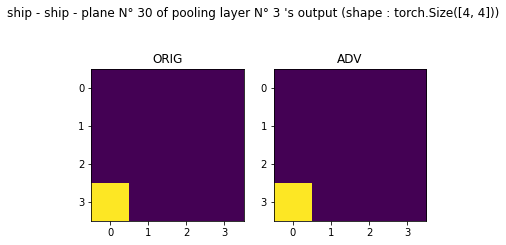

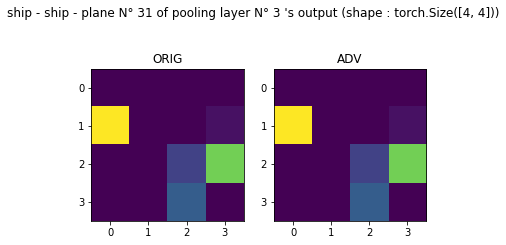

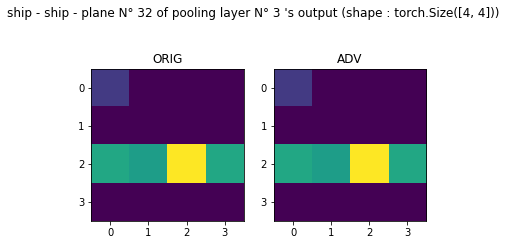

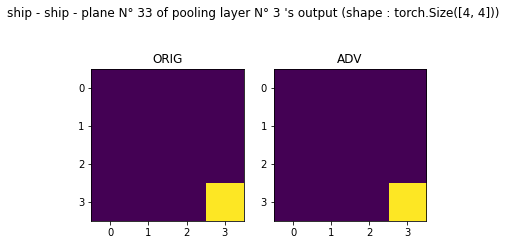

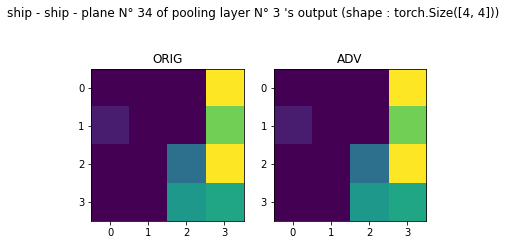

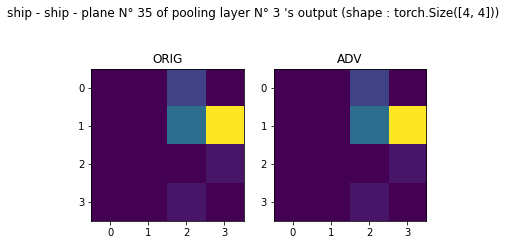

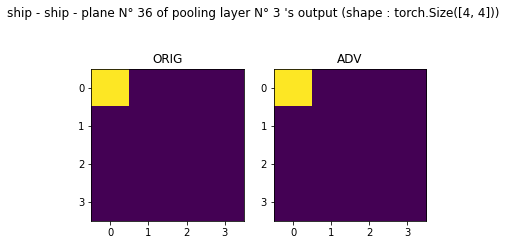

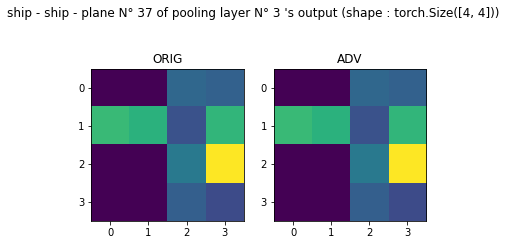

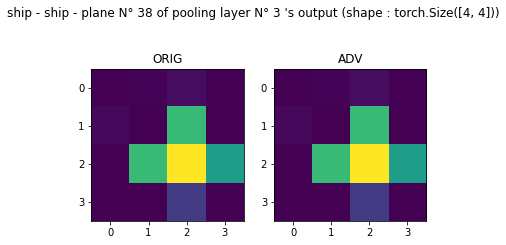

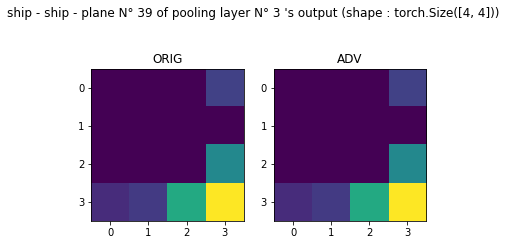

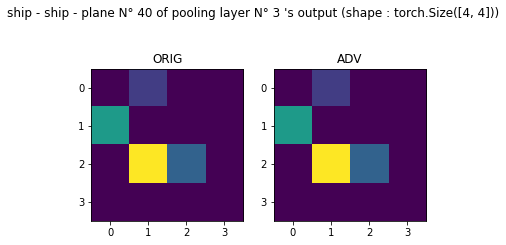

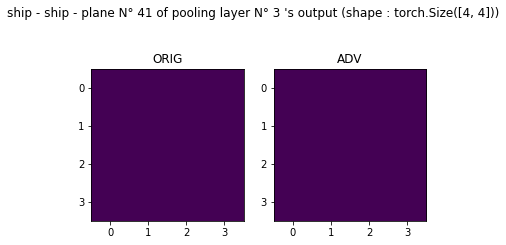

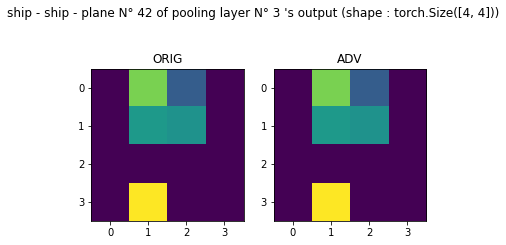

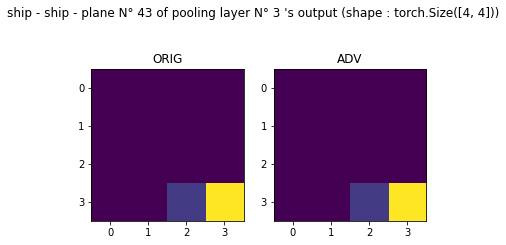

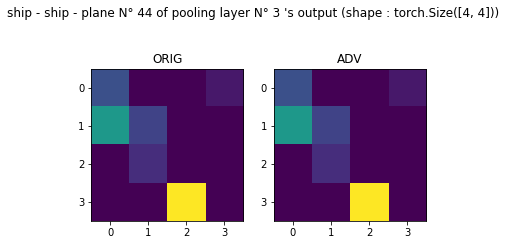

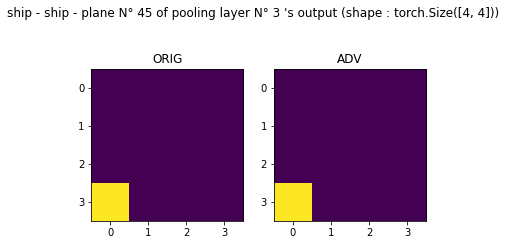

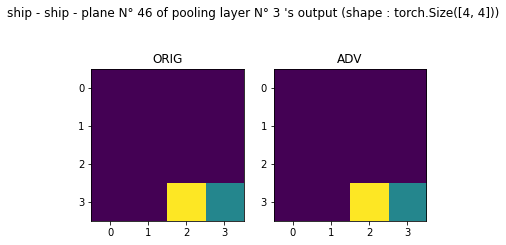

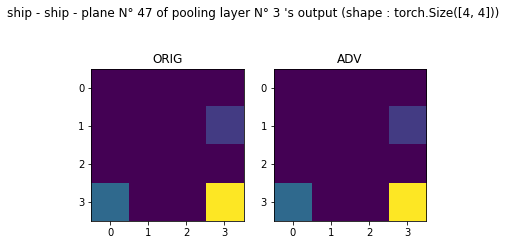

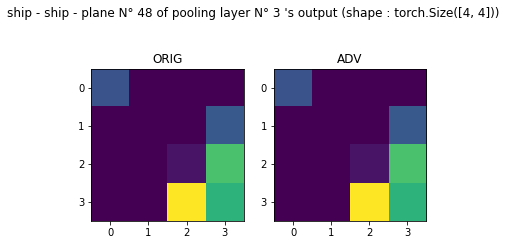

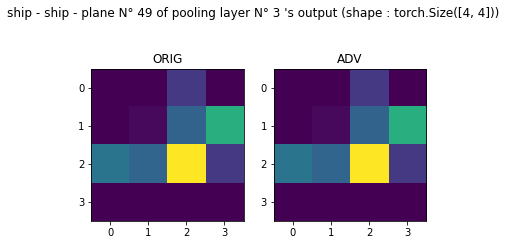

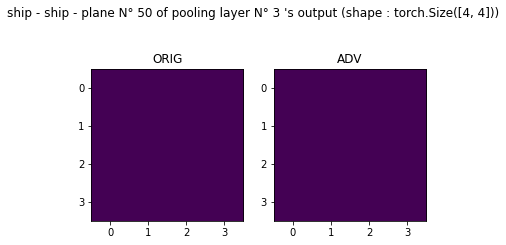

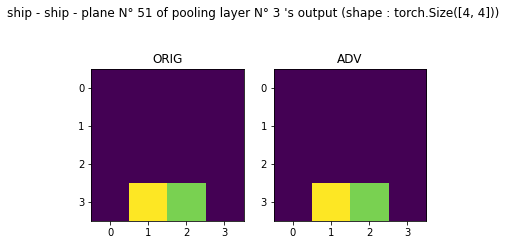

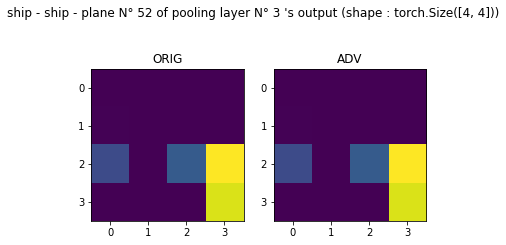

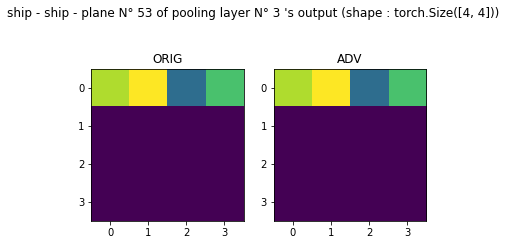

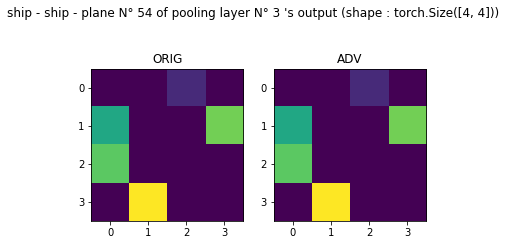

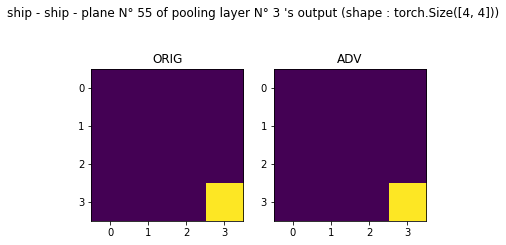

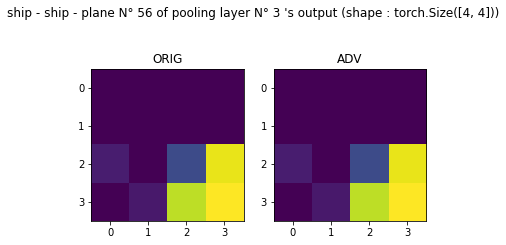

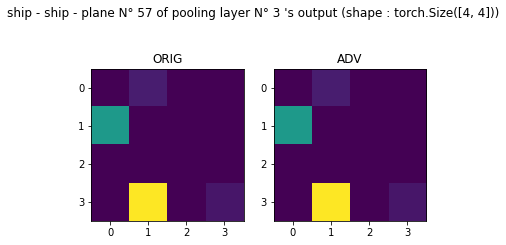

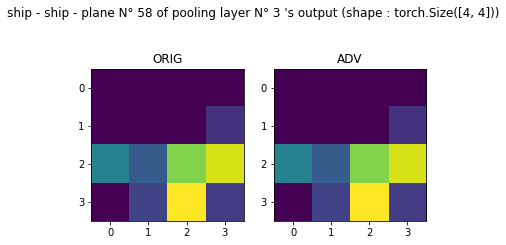

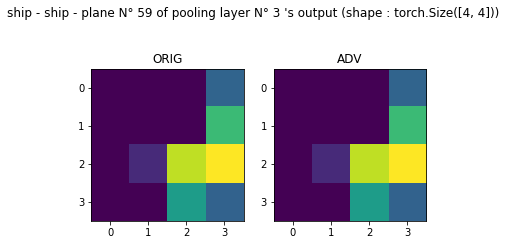

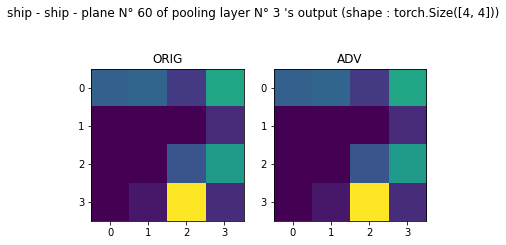

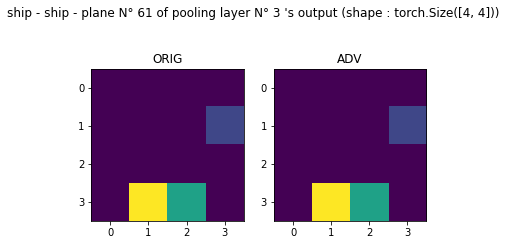

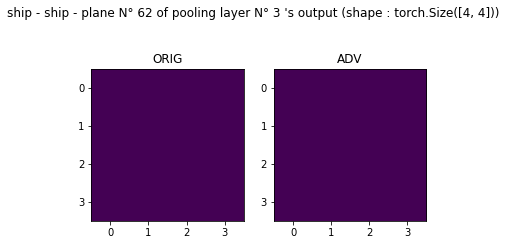

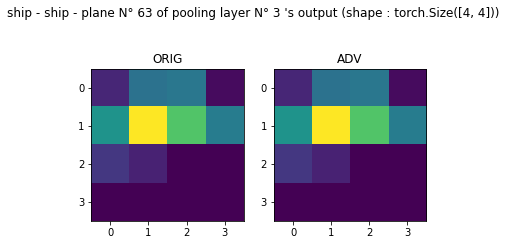

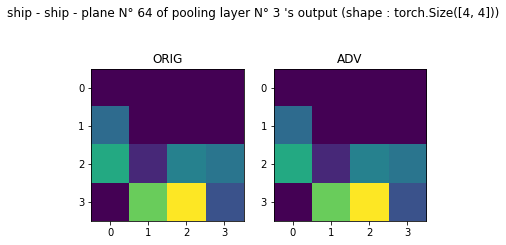

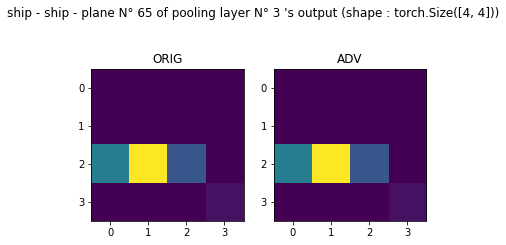

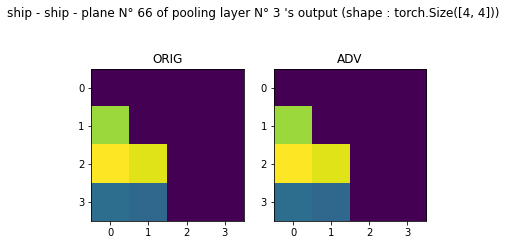

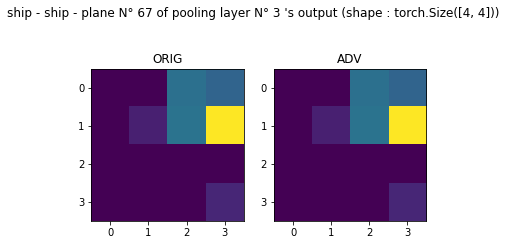

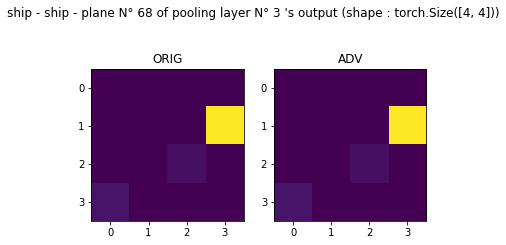

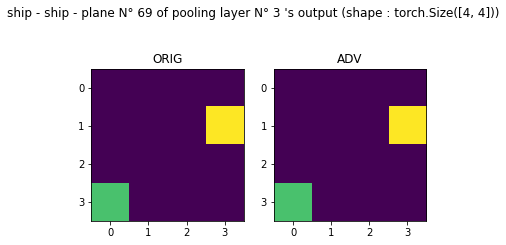

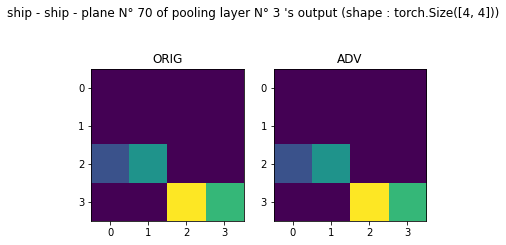

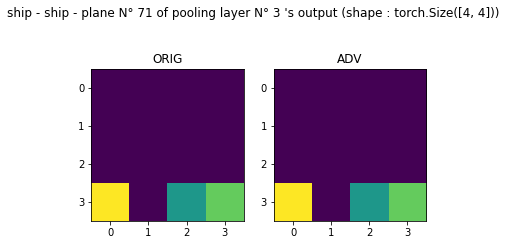

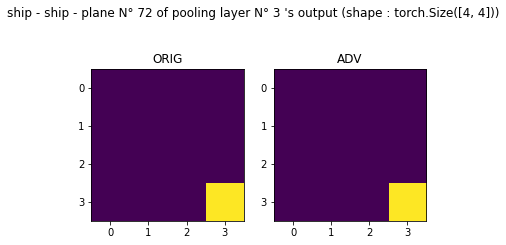

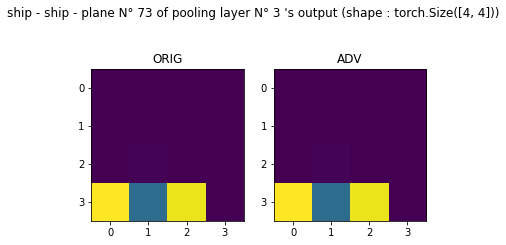

In [ ]:
#checking for more examples
eps=0
vecs=[]
adv_vecs=[]
keys=[]
ind_diff=[]
for i in range(10):  # len(model.testset)

  print("___________________________________________________________________________________")
  img = model.testset[i][0]
  pred = classes[model.identify(img)]
  print("---------------------------  Indentified as ", pred  ,"----------------------------")
  layers=  model.model.layers
  # for i in range(1):  # len(model.model.layers)-3
  #   out_conv = model.model.layers[i].squeeze()
  #   print(out_conv.shape)
  #   for j in range(out_conv.shape[0]):
  #     plt.imshow(out_conv[j].detach().cpu()) #np.transpose(
  #     plt.title("{} - {}_th plane of {}_th pooling layer's output (shape : {})".format(pred,j+1,i+1,out_conv[j].shape))
  #     plt.show()
  
  #generate adversarial
  new_img= fgsm.generate_adv((img[None, ...]).to(model.device),
                                     torch.tensor([label]).to(model.device),
                                     **fgsm_params)
  new_img = new_img[0]
  pred_adv=classes[model.identify(new_img)]
  print("-----------------  Adversarial version identified as ", pred_adv  ,"-----------------")
  layers_adv =  model.model.layers

  for i in [0,2,3]:  #len(model.model.layers)-
    out_conv = layers[i].squeeze()
    out_conv_adv = layers_adv[i].squeeze()
    for j in range(out_conv.shape[0]):
      plt.suptitle("{} - {} - plane N° {} of pooling layer N° {} 's output (shape : {})".format(pred, pred_adv,j+1,i+1,out_conv[j].shape))
      sub1=plt.subplot(121)
      sub1.imshow(out_conv[j].detach().cpu()) #np.transpose(
      sub1.set_title("ORIG")
      sub2=plt.subplot(122)
      sub2.imshow(out_conv[j].detach().cpu())
      sub2.set_title("ADV")
      plt.show()


##1st fully connected layer's weights

In [ ]:
print(model.model)
fc1_weights= model.model.fc1.weight
print(type(fc1_weights))
print(fc1_weights.shape)
_,ind= torch.topk(fc1_weights,k=10, dim=0)
print(ind)
#not sure it is correct